# Data Cleaning

## Setup

Import libraries for data cleaning, data visualization, and analysis

In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

Set theme for seaborn

In [2]:
sns.set_theme()

Add file path to save images. Leave empty to not save images

In [3]:
#FILEPATH = 'images/'
FILEPATH = ''

Read laptop data xlsx file

In [4]:
fileName = 'amazon_laptop_2023.xlsx'
df = pd.read_excel(fileName)
df

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,HP,EliteBook 840,14 Inches,Silver,256 GB,Core i5 6200U,16 GB,Windows 10 Pro,Anti Glare Coating,Integrated,NaN,NaN,4.0,"$1,000.00"
1,Dell,Inspiron 15 3530,15.6 Inches,Black,2 TB,Core i7 Family,64 GB,Windows 11 Home,NaN,Integrated,Intel Iris Xe Graphics,NaN,4.2,"$1,000.00"
2,Dell,Vostro 3510 Laptop,15.6 Inches,Black,1000 GB,Core i7,32 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,"$1,000.99"
3,Dell,Inspiron 7420 2-in-1,14 Inches,"Grey, Gray, Platinum Silver",2000 GB,Core i5,64 GB,Windows 11 Pro,NaN,Integrated,Intel Integrated Graphics,NaN,NaN,"$1,001.11"
4,MSI,Prestige 14Evo A11MO-217,14 Inches,Gary,NaN,Core i7,32 GB,Windows 10,"Anti-glare,Thin Bezel",Integrated,Intel Iris Xe Graphics,NaN,4.2,"$1,001.18"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,Dell,Dell Latitude Rugged 5404,14 Inches,Black,256 GB,Core i7,8 GB,Windows 10 Pro,Backlit Keyboard,Integrated,NaN,NaN,4.3,NaN
4442,HP,HPS13,15 Inches,Grey,128 GB,Pentium Other,4 GB,Windows 11 S,HD Audio,Integrated,NaN,NaN,4.3,NaN
4443,Microsoft,Surface Laptop Go 2,12.4 Inches,Sage,256 GB,Intel Core i5-1135G7,8 GB,Windows 10 S,NaN,Integrated,Intel Iris,NaN,NaN,NaN
4444,dell,DELL Latitude 5300,13.3 Inches,NaN,512 GB,Core i5 8250U,16 GB,Windows 10 Pro,Speakers,Integrated,Intel Integrated Graphics,NaN,4.2,NaN


## Pre-cleaning

Drop any column with all missing data, and rows with missing model name

In [5]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, subset=['model'])
len(df)

3282

Drop rows which are exact duplicates

In [6]:
df = df.drop_duplicates(ignore_index=True, keep='first')
len(df)

2497

Standardize column names (Like making OS lower case)

In [7]:
df.columns = df.columns.str.lower().str.strip()
df.columns.values.tolist()

['brand',
 'model',
 'screen_size',
 'color',
 'harddisk',
 'cpu',
 'ram',
 'os',
 'special_features',
 'graphics',
 'graphics_coprocessor',
 'cpu_speed',
 'rating',
 'price']

Group categorical data and clean categorical data

In [8]:
MISSINGCATEGORICAL = '_MISSING_'

# Replaces missing data with MISSINGCATEGORICAL and 
# extract only alphanumeric and 'normal' characters
def cleanCategorical(df, categoricalData):
    for column in categoricalData:
        df[column] = df[column].str.casefold().str.strip()
        df[column] = df[column].str.extract(r'([a-zA-Z0-9\s\-\/,&.]+)')
        df[column] = df[column].fillna(MISSINGCATEGORICAL) # MISSINGCATEGORICAL instead of pd.NA since it is easier to process
    return df

categoricalData = ['brand', 'model', 'color', 'cpu', 'os', 'special_features', 'graphics', 'graphics_coprocessor']
df = cleanCategorical(df, categoricalData)
df[categoricalData]

,brand,model,color,cpu,os,special_features,graphics,graphics_coprocessor
0,hp,elitebook 840,silver,core i5 6200u,windows 10 pro,anti glare coating,integrated,_MISSING_
1,dell,inspiron 15 3530,black,core i7 family,windows 11 home,_MISSING_,integrated,intel iris xe graphics
2,dell,vostro 3510 laptop,black,core i7,windows 10 home,wifi & bluetooth,integrated,_MISSING_
3,dell,inspiron 7420 2-in-1,"grey, gray, platinum silver",core i5,windows 11 pro,_MISSING_,integrated,intel integrated graphics
4,msi,prestige 14evo a11mo-217,gary,core i7,windows 10,"anti-glare,thin bezel",integrated,intel iris xe graphics
...,...,...,...,...,...,...,...,...
2492,dell,dell latitude rugged 5404,black,core i7,windows 10 pro,backlit keyboard,integrated,_MISSING_
2493,hp,hps13,grey,pentium other,windows 11 s,hd audio,integrated,_MISSING_
2494,microsoft,surface laptop go 2,sage,intel core i5-1135g7,windows 10 s,_MISSING_,integrated,intel iris
2495,dell,dell latitude 5300,_MISSING_,core i5 8250u,windows 10 pro,speakers,integrated,intel integrated graphics


Group numerical data and clean numerical data

In [9]:
MISSINGNUMERICAL = 0

# Replaces missing data with MISSINGNUMERICAL and 
# extract only numerical data while ignoring strings
# also removes commas from numbers
def cleanNum(df, columnName):
    if df[columnName].dtypes != 'float64':
        df[columnName] = df[columnName].replace(',','', regex=True)
        df[columnName] = df[columnName].str.extract(r'([-+]?\d*\.?\d+)').astype(float)
    df[columnName] = df[columnName].fillna(MISSINGNUMERICAL) # MISSINGNUMERICAL instead of NaN as it is easier to process
    return df[columnName]

# Apply function to list of numerical data
def cleanAllNum(df, numericalData):
    for column in numericalData:
        df[column] = cleanNum(df, column)
    return df

numericalData = ['harddisk', 'ram', 'screen_size', 'cpu_speed', 'rating', 'price']
df = cleanAllNum(df, numericalData)
df[numericalData]

,harddisk,ram,screen_size,cpu_speed,rating,price
0,256.0,16.0,14.0,0.0,4.0,1000.00
1,2.0,64.0,15.6,0.0,4.2,1000.00
2,1000.0,32.0,15.6,0.0,0.0,1000.99
3,2000.0,64.0,14.0,0.0,0.0,1001.11
4,0.0,32.0,14.0,0.0,4.2,1001.18
...,...,...,...,...,...,...
2492,256.0,8.0,14.0,0.0,4.3,0.00
2493,128.0,4.0,15.0,0.0,4.3,0.00
2494,256.0,8.0,12.4,0.0,0.0,0.00
2495,512.0,16.0,13.3,0.0,4.2,0.00


## Column cleaning

Clean Hard Disk

In [10]:
# If number is below 8, it must be in TB https://techfident.co.uk/how-much-storage-do-i-need-on-my-laptop/
def tbToGBHDD(row):
    return row * 1024 if row <= 8 else row # Multiply TB values (less than 8) by 1024 to make it GB

In [11]:
def cleanHDD(df):
    df['harddisk'] = df["harddisk"].apply(tbToGBHDD)
    return df

df = cleanHDD(df)
df['harddisk']

0        256.0
1       2048.0
2       1000.0
3       2000.0
4          0.0
         ...  
2492     256.0
2493     128.0
2494     256.0
2495     512.0
2496       0.0
Name: harddisk, Length: 2497, dtype: float64

Clean CPU Speed

In [12]:
# Number cannot be greater than 10 GHz. It must be in MHz instead of GHz. 
# https://www.lenovo.com/gb/en/glossary/what-is-processor-speed/
def mhzToGhzCPU(row):
    return round(row / 1000, 1) if row > 10 else round(row, 1) # Divide MHz values (more than 10) by 1000 to make it GHz

In [13]:
def cleanCPUSpeed(df):
    df['cpu_speed'] = df['cpu_speed'].apply(mhzToGhzCPU)
    return df

df = cleanCPUSpeed(df)
df['cpu_speed']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2492    0.0
2493    0.0
2494    0.0
2495    0.0
2496    0.0
Name: cpu_speed, Length: 2497, dtype: float64

Clean RAM

In [14]:
# Round the ram (as they cannot be a decimal number)
def cleanRam(df):
    df["ram"] = df["ram"].round()
    return df

df = cleanRam(df)
df['ram']

0       16.0
1       64.0
2       32.0
3       64.0
4       32.0
        ... 
2492     8.0
2493     4.0
2494     8.0
2495    16.0
2496     8.0
Name: ram, Length: 2497, dtype: float64

Clean OS

In [15]:
# Remove unnecessary information and only extract OS type, and version
def standardizeOS(row):
    osMapping = {
        r'windows 10|win 10': 'windows10',
        r'windows 11|win 11': 'windows11',
        r'windows 8|win 8': 'windows8',
        r'windows 7|win 7': 'windows7',
        r'windows': 'windows',
        r'chrome os': 'chromeos',
        r'linux': 'linux',
        r'mac os|macos': 'macos',
    }
    for regex, os in osMapping.items():
        if re.search(regex, row):
            return os
    return MISSINGCATEGORICAL

In [16]:
def cleanOS(df):
    df['os'] = df['os'].apply(standardizeOS)
    return df

df = cleanOS(df)
df['os']

0       windows10
1       windows11
2       windows10
3       windows11
4       windows10
          ...    
2492    windows10
2493    windows11
2494    windows10
2495    windows10
2496    windows10
Name: os, Length: 2497, dtype: object

Clean Color

In [17]:
# Standardize the colors to remove things such as 'Darkside of the moon'
def standardizeColor(row):
    colorMap = {
        r'black|dark (?:metallic|side)|carbon|balck': 'black',
        r'silver|platinum|aluminum|sliver|midnight|mercury': 'silver',
        r'gr[ae]y|gary|lunar|graphite|ash': 'grey',
        r'blue|cobalt|sky|teal': 'blue',
        r'red': 'red',
        r'white|light': 'white',
        r'almond|dune|beige': 'brown',
        r'yellow|gold|apollo': 'yellow',
        r'green|mint|sage|moss': 'green',
        r'pink|electro': 'pink',
    }
    for regex, color in colorMap.items():
        if re.search(regex, row):
            return color
    return MISSINGCATEGORICAL

In [18]:
# Split colors by [,] and [/] (which means multiple choice of colors), and explode it into multiple rows
def cleanColor(df):
    df['color'] = df['color'].str.split(r'[,/]')
    df = df.explode('color')
    df['color'] = df['color'].str.strip()
    df['color'] = df['color'].apply(standardizeColor)
    return df

df = cleanColor(df)
df['color']

0          silver
1           black
2           black
3            grey
3            grey
          ...    
2492        black
2493         grey
2494        green
2495    _MISSING_
2496        black
Name: color, Length: 2553, dtype: object

Clean special features

In [19]:
# Standardize spelling and meaning for standard features
# Then sort them alphabetically and convert it into a tuple of features
def standardizeFeatures(row):
    sfMapping = {
        r'anti-? ?glare|anti[ -]?(?:gla|reflection)' : 'anti-glare',
        r'backlit|backlight|keyboard': 'backlit keyboard',
        r'edge|thin|narrow|bezel': 'thin bezel',
        r'stylus|pen|stylus': 'stylus',
        r'audio': 'hd audio',
        r'fingerprint': 'fingerprint reader',
        r'speakers|stereo': 'stereo speakers',
        r'wifi & bluetooth': 'wifi and bluetooth',
        r'resistant|water|dishwasher': 'water resistant',
        r'gorilla': 'corning gorilla glass',
        r'keypad': 'numeric keypad',
        r'chiclet': 'chiclet keyboard',
        r'touch[ -]?screen': 'touch-screen',
        r'multi[ -]?touch': 'multi-touch',
        r'alexa': 'alexa',
        r'light and compact|narrow|space saving|portable': 'lightweight',
        r'ruggedized': 'rugged',
        r'2[ -]in[ -]1': '2-in-1',
        r'information not available|and play on a fast|work|create|high quality|built for entertainment|premium business-class notebook|windows laptop|i5 laptop|intel uhd graphics': MISSINGCATEGORICAL,
    }
    updated = set()
    for item in row:
        if item == '':
            continue
        item = item.strip()
        notFound = True
        for regex, feature in sfMapping.items():
            if re.search(regex, item):
                updated.add(feature)
                notFound = False
                break
        if notFound:
            updated.add(MISSINGCATEGORICAL)
                
    if MISSINGCATEGORICAL in updated:
        updated.remove(MISSINGCATEGORICAL)
        
    return tuple(sorted(updated))

In [20]:
# Get special features located in model name
def getSpecialFeature(row):
    specialFeaturesPattern = r'detachable 2[ -]in[ -]1|2[ -]in[ -]1|rugged|multi-touch'
    specialFeatures = re.findall(specialFeaturesPattern, row['model'])
    if specialFeatures:
        for feature in specialFeatures:
            row['model'] = row['model'].replace(feature, '').strip()
        row['special_features'] += specialFeatures
    return row

In [21]:
def cleanSpecialFeatures(df):
    df['special_features'] = df['special_features'].str.split(',')
    df = df.apply(getSpecialFeature, axis=1)
    df['special_features'] = df['special_features'].apply(standardizeFeatures)
    return df

df = cleanSpecialFeatures(df)
df['special_features']

0               (anti-glare,)
1                          ()
2       (wifi and bluetooth,)
3                   (2-in-1,)
3                   (2-in-1,)
                ...          
2492      (backlit keyboard,)
2493              (hd audio,)
2494                       ()
2495       (stereo speakers,)
2496                       ()
Name: special_features, Length: 2553, dtype: object

Clean graphics coprocessor and graphics

In [22]:
# Get the GPU in graphics column and move to graphics_coprocessor if its empty
# Uses masks to make it much easier
def extractGPU(df):
    mask = df['graphics'].isin(['integrated', 'dedicated', MISSINGCATEGORICAL]) == False
    null_mask_graphics_co = df['graphics_coprocessor'].str.contains(MISSINGCATEGORICAL)
    search_mask = mask & null_mask_graphics_co
    df.loc[search_mask, 'graphics_coprocessor'] = df.loc[search_mask, 'graphics']
    df.loc[mask, 'graphics'] = MISSINGCATEGORICAL
    return df

In [23]:
# Extract GPU into gpuBrand and gpuModel using regex
def standardizeGPU(row):
    gpuExtract = {
        r'(?P<gpuBrand>nvidia[ _]?(?:quadro rtx|quadro|rtx|gtx)?)[ _]?(?:intel)?[ _]?(?P<gpuModel>\d{4}[ _]?(ti)?\s?(?:ada)?|[kpat]\d{4}[m]?|([ktpa]|mx)?\d{3}m?)?', # Nvidia
        r'(?P<gpuBrand>intel[ _]?(?:iris|u?hd))[ _]?(?P<gpuModel>\d{3,4})?', # Intel iris, hd and uhd
        r'^(integrated)?\s?(?P<gpuBrand>intel[ ]?(celeron|arc)?)\s?(integrated|dedicated|(?:processor|integrated)?)?\s?(?P<gpuModel>a\d{3}m)?$', # Intel, ICeleron and IArc
        r'(?P<gpuBrand>amd)\s?(?P<gpuModel>(?:(?:mobility|\s?radeon)+)?\s?(?:(?:\s|wx|rx|vega|pro|r[457]|hd|athlon|silver|integrated|m|gl)+)?\s?(?:\d{1,4}m?)?)', # AMD this also works r'(amd)\s?((?:(?!rtx).)*)'
        r'(?P<gpuBrand>apple)\s?(?P<gpuModel>m1\s?(?:pro)?)?', # Apple
        r'(?P<gpuBrand>mediatek)', # Mediatek
        r'(?P<gpuBrand>arm)\s?(?P<gpuModel>mali-g\d{2}\s?(?:mp3|2ee mc2))', # Arm
    }
    
    useless = r'xps9300-7909slv-pus|inter core i7-8650u'
    
    for regex in gpuExtract:
        if match := re.search(regex, row):
            if match.groupdict().get('gpuModel'):
                return match.group('gpuBrand').strip()+ ' ' + match.group('gpuModel').strip()
            else:
                return match.group('gpuBrand').strip()
    
    if re.search(useless, row):
        return MISSINGCATEGORICAL
    
    return row

In [24]:
# Set graphics column value based on graphics_coprocessor column
def fillInGraphics(df):
    integrated = r'integrated|intel|mediatek|powervr|arm|adreno|athlon|mobility|6[18]0m|vega|r4|r5|r7' # https://www.notebookcheck.net/AMD-Radeon-610M-GPU-Benchmarks-and-Specs.654293.0.html
    dedicated = r'dedicated|nvidia|560|rx'
    mask = df['graphics_coprocessor'].str.contains(integrated)
    df.loc[mask, 'graphics'] = 'integrated'
    mask = df['graphics_coprocessor'].str.contains(dedicated)
    df.loc[mask, 'graphics'] = 'dedicated'
    return df

In [25]:
# Standardize GPU names for easier extraction
# Remove all 'dedicated' and 'integrated' after Graphics column filled in 
# Split the GPU brand and model into two column
def cleanGPU(df):
    gpuMapping = {
        r'iris x[e]?|intel xe': 'intel iris',
        r'nvidia geforce[r]?|geforce': 'nvidia',
        r'nvidia (?:trx|rtx)|nvidia intel rtx': 'nvidia rtx',
        r'(?<!nvidia)quadro|qn20-m1-r': 'nvidia quadro', # https://forums.lenovo.com/t5/ThinkPad-P-and-W-Series-Mobile-Workstations/NVIDIA-QN20-M1-R/m-p/5165568 and https://www.reddit.com/r/laptops/comments/wxlz4p/anyone_heard_of_a_nvidia_qn20m1r_graphics_card/
        r'\bgt\b': 'gtx',
        r'ati': 'amd', # https://www.networkworld.com/article/735534/data-center-amd-says-goodbye-to-the-ati-brand.html
        r'620u': 'uhd 620',
        r'^t550$': 'nvidia quadro t550',
        r'^t1200$': 'nvidia quadro t1200',
        r'(?<!\w )nvidia t': 'nvidia quadro t',
        r'(?<!\w )rtx': 'nvidia rtx',
        r'(?<!\w )radeon': 'amd radeon',
        r'^nvidia 3050$': 'nvidia rtx 3050',
        r'(?<!\w )uhd': 'intel uhd',
        r'(?<!\w )(?<!u)hd|gt2': 'intel hd', # https://www.techpowerup.com/gpu-specs/intel-haswell-gt2.g591
        r'(?<!rtx\s)a3000': 'rtx a3000',
        r'(?<!apple\s)m1': 'apple m1',
        r'(?<!arm\s)mali': 'arm mali',
        r'(?<!powervr\s)gx6250': 'powervr gx6250',
        r'integrated[ _]?graphics|embedded|intergrated|integreted': 'integrated',
        r'dedicated|integrated[ ,]+dedicated': 'dedicated',
        r' graphic[s]?': '',
        r'^amd radeon 5$': 'amd radeon r5',
        r'^amd radeon 7$': 'amd radeon r7',
    }
    
    df = extractGPU(df)
    
    for regex, gpu in gpuMapping.items():
        df['graphics_coprocessor'] = df['graphics_coprocessor'].str.replace(regex, gpu, regex=True)
    
    df['graphics_coprocessor'] = df['graphics_coprocessor'].apply(standardizeGPU)
    
    df = fillInGraphics(df)
    
    dedicatedIntegratedMapping = {
        r'^dedicated$|^integrated$': MISSINGCATEGORICAL,
        r' integrated| dedicated': '',
    }
    
    for regex, replacement in dedicatedIntegratedMapping.items():
        df['graphics_coprocessor'] = df['graphics_coprocessor'].str.replace(regex, replacement, regex=True)
    
    df[['gpuBrand', 'gpuModel']] = df['graphics_coprocessor'].str.split(n=1, expand=True)
    df['gpuModel'] = df['gpuModel'].fillna(MISSINGCATEGORICAL)
    df = df.drop(columns=['graphics_coprocessor'], axis = 1)
    
    return df

df = cleanGPU(df)
df[['graphics', 'gpuBrand', 'gpuModel']]

,graphics,gpuBrand,gpuModel
0,integrated,_MISSING_,_MISSING_
1,integrated,intel,iris
2,integrated,_MISSING_,_MISSING_
3,integrated,intel,_MISSING_
3,integrated,intel,_MISSING_
...,...,...,...
2492,integrated,_MISSING_,_MISSING_
2493,integrated,_MISSING_,_MISSING_
2494,integrated,intel,iris
2495,integrated,intel,_MISSING_


Clean CPU

In [26]:
# Standardize CPU into brand and column
# If no brand was found, infer it based on cpu model 
def standardizeCPU(row):
    cpuBrand = None
    
    cpuExtract = {
        r'(?P<cpuBrand>amd)?\s?(?P<cpuModel>(?:ryzen|(?:[ra]\s|a-)series|athlon|silver|kabini|a4|a10)+(?:(?:\s|[a]?\d{1}|\d{4}|[umxhk]|-)+)?)', # AMD
        r'(?P<cpuBrand>intel)?[ ]?(?P<cpuModel>(?:celeron|core|pentium|atom|xeon|mobile)+[ ]?(?:[imd](?:\d{1})?-?)?[ ]?(?:\d{3,5}[ugxmhktyq]+(?:\d{1})?e?|[nzp](?:\d{4})?|5y10|extreme|2 quad)?)', # Intel
        r'(?P<cpuModel>(?:cortex) (?:a\d{1,2}))', # Arm
        r'(?P<cpuModel>snapdragon)' # Qualcomm
    }
    
    cpuBrandMap = {
        r'ryzen|a[- ]series|athlon|a10|kabini|a4': 'amd', # https://www.amd.com/en/products/specifications/processors
        r'celeron|core|pentium|atom|xeon|mobile': 'intel', # https://ark.intel.com/content/www/us/en/ark.html
        r'cortex': 'arm', # https://www.arm.com/products/silicon-ip-cpu
        r'snapdragon': 'qualcomm', # https://www.qualcomm.com/snapdragon/overview
    }
    
    for regex in cpuExtract:
        if match := re.search(regex, row):
            if not match.groupdict().get('cpuBrand'):
                for regex, brand in cpuBrandMap.items():
                    if re.search(regex, row):
                        cpuBrand = brand 
                        break
            else:
                cpuBrand = match.group('cpuBrand').strip()
            
            if match.groupdict().get('cpuModel'):
                return cpuBrand + ' ' + match.group('cpuModel').strip().replace('-',' ')
            else:
                return cpuBrand
    
    return row

In [27]:
# Tidy up CPU for easier extraction
# Then split cpu into cpu brand and model
def cleanCPU(df):
    cpuMapping = {
        r'corei7-10750h': 'core i7-10750h',
        r'unknown|others':MISSINGCATEGORICAL,
        r' dual-core| cpu| family| other| processor': '',
    }
    
    for regex, replacement in cpuMapping.items():
        df['cpu'] = df['cpu'].str.replace(regex, replacement, regex=True)
        
    df['cpu'] = df['cpu'].apply(standardizeCPU)
    
    df[['cpuBrand', 'cpuModel']] = df['cpu'].str.split(n=1, expand=True)
    df['cpuModel'] = df['cpuModel'].fillna(MISSINGCATEGORICAL)
    df = df.drop(columns=['cpu'], axis = 1)

    return df

df = cleanCPU(df)
df[['cpuBrand', 'cpuModel']]

,cpuBrand,cpuModel
0,intel,core i5 6200u
1,intel,core i7
2,intel,core i7
3,intel,core i5
3,intel,core i5
...,...,...
2492,intel,core i7
2493,intel,pentium
2494,intel,core i5 1135g7
2495,intel,core i5 8250u


Clean Model and Brand

In [28]:
# Move the brand which are actually models to the model column
def moveBrand(row):
    modelInBrand = ['alienware', 'latitude', 'toughbook', 'jtd']
    for model in modelInBrand:
        if model in row['brand'] and model not in row['model']:
            row['model'] = model + ' ' + row['model']
            break
    return row

In [29]:
# Standardize brands which are the same
def cleanBrand(row):
    brandMapping = {
        r'mac': 'apple',
        r'toughbook': 'panasonic',
        r'alienware|latitude': 'dell',
    }
    for regex, brand in brandMapping.items():
        if re.search(regex, row):
            return brand
    return row

In [30]:
# If the brand is in the model name, remove it
def removeBrandInModel(row, brands):
    for brand in brands:
        if brand in row['model']:
            row['brand'] = brand
            row['model'] = row['model'].replace(brand, '').strip()
            break
    return row

In [31]:
# From the model name, infer the brand
def fillBrandFromModel(row):
    brandMapping = {
        r'mac': 'apple',
        r'toughbook': 'panasonic',
        r'alienware|latitude|precision|e6520': 'dell',
        r'zephyrus|fire': 'asus',
    }
    for regex, brand in brandMapping.items():
        if re.search(regex, row['model']):
            row['brand'] = brand
            break
    return row

In [32]:
# Fix typo and remove unnecessary text from model name
def removeUnnecessaryFromModel(df):
    replaceMap = {
        r'lititude': 'latitude',
        r'laptop|newest|flagship|commercial| pc|mobile workstation': '',
    }
    for regex, replace in replaceMap.items():
        df['model'] = df['model'].replace(regex, replace, regex=True)
    
    return df

In [33]:
# Remove double spaces and trailing whitespace
def cleanup(row):
    row = row.strip()
    row = re.sub('  +', ' ', row)
    return row

In [34]:
# Apply all previously mentioned function to the brand nad model column
def cleanModelAndBrand(df):
    df = df.apply(moveBrand, axis=1)
    df['brand'] = df['brand'].apply(cleanBrand)
    brands = df['brand'].unique()
    df = df.apply(removeBrandInModel, axis=1, brands=brands)
    df = df.apply(fillBrandFromModel, axis=1)
    df = removeUnnecessaryFromModel(df)
    df['model'] = df['model'].apply(cleanup)
    return df

df = cleanModelAndBrand(df)
df[['brand', 'model']]

,brand,model
0,hp,elitebook 840
1,dell,inspiron 15 3530
2,dell,vostro 3510
3,dell,inspiron 7420
3,dell,inspiron 7420
...,...,...
2492,dell,latitude 5404
2493,hp,s13
2494,microsoft,surface go 2
2495,dell,latitude 5300


## Post-cleaning

Drop rows which are exact duplicates and drop MISSINGNUMERICAL and pd.NA in model

In [35]:
df['model'] = df['model'].str.strip()
df = df.drop_duplicates(ignore_index=True, keep='first')
df = df[df['model'] != MISSINGCATEGORICAL]
df = df.dropna(axis=0, subset=['model'])
df = df[df['model'].str.len() > 0]
df['model']

0            elitebook 840
1         inspiron 15 3530
2              vostro 3510
3            inspiron 7420
4            inspiron 7420
               ...        
2520         latitude 5404
2521                   s13
2522          surface go 2
2523         latitude 5300
2524    prodesk 400 g3-sff
Name: model, Length: 2498, dtype: object

Rename columns to be more descriptive

In [36]:
df = df.rename(columns={
    "harddisk": "harddisk_gb", 
    "ram": "ram_gb", 
    "screen_size": "screen_size_in", 
    "cpu_speed": "cpu_speed_ghz", 
    "price": "price_dollar"
})
df

,brand,model,screen_size_in,color,harddisk_gb,ram_gb,os,special_features,graphics,cpu_speed_ghz,rating,price_dollar,gpuBrand,gpuModel,cpuBrand,cpuModel
0,hp,elitebook 840,14.0,silver,256.0,16.0,windows10,"(anti-glare,)",integrated,0.0,4.0,1000.00,_MISSING_,_MISSING_,intel,core i5 6200u
1,dell,inspiron 15 3530,15.6,black,2048.0,64.0,windows11,(),integrated,0.0,4.2,1000.00,intel,iris,intel,core i7
2,dell,vostro 3510,15.6,black,1000.0,32.0,windows10,"(wifi and bluetooth,)",integrated,0.0,0.0,1000.99,_MISSING_,_MISSING_,intel,core i7
3,dell,inspiron 7420,14.0,grey,2000.0,64.0,windows11,"(2-in-1,)",integrated,0.0,0.0,1001.11,intel,_MISSING_,intel,core i5
4,dell,inspiron 7420,14.0,silver,2000.0,64.0,windows11,"(2-in-1,)",integrated,0.0,0.0,1001.11,intel,_MISSING_,intel,core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,dell,latitude 5404,14.0,black,256.0,8.0,windows10,"(backlit keyboard,)",integrated,0.0,4.3,0.00,_MISSING_,_MISSING_,intel,core i7
2521,hp,s13,15.0,grey,128.0,4.0,windows11,"(hd audio,)",integrated,0.0,4.3,0.00,_MISSING_,_MISSING_,intel,pentium
2522,microsoft,surface go 2,12.4,green,256.0,8.0,windows10,(),integrated,0.0,0.0,0.00,intel,iris,intel,core i5 1135g7
2523,dell,latitude 5300,13.3,_MISSING_,512.0,16.0,windows10,"(stereo speakers,)",integrated,0.0,4.2,0.00,intel,_MISSING_,intel,core i5 8250u


Change data type of columns

In [37]:
new_data_types = {
    'harddisk_gb': 'Int64',
    'ram_gb': 'Int64',
}

df = df.astype(new_data_types)
df.dtypes

brand                object
model                object
screen_size_in      float64
color                object
harddisk_gb           Int64
ram_gb                Int64
os                   object
special_features     object
graphics             object
cpu_speed_ghz       float64
rating              float64
price_dollar        float64
gpuBrand             object
gpuModel             object
cpuBrand             object
cpuModel             object
dtype: object

Change order of columns

In [38]:
newOrder = ['brand', 'model', 'screen_size_in', 'color', 'harddisk_gb',
            'cpuBrand', 'cpuModel', 'ram_gb', 'os', 'special_features',
            'graphics', 'gpuBrand', 'gpuModel', 'cpu_speed_ghz', 'rating', 'price_dollar']

df = df[newOrder]
df

,brand,model,screen_size_in,color,harddisk_gb,cpuBrand,cpuModel,ram_gb,os,special_features,graphics,gpuBrand,gpuModel,cpu_speed_ghz,rating,price_dollar
0,hp,elitebook 840,14.0,silver,256,intel,core i5 6200u,16,windows10,"(anti-glare,)",integrated,_MISSING_,_MISSING_,0.0,4.0,1000.00
1,dell,inspiron 15 3530,15.6,black,2048,intel,core i7,64,windows11,(),integrated,intel,iris,0.0,4.2,1000.00
2,dell,vostro 3510,15.6,black,1000,intel,core i7,32,windows10,"(wifi and bluetooth,)",integrated,_MISSING_,_MISSING_,0.0,0.0,1000.99
3,dell,inspiron 7420,14.0,grey,2000,intel,core i5,64,windows11,"(2-in-1,)",integrated,intel,_MISSING_,0.0,0.0,1001.11
4,dell,inspiron 7420,14.0,silver,2000,intel,core i5,64,windows11,"(2-in-1,)",integrated,intel,_MISSING_,0.0,0.0,1001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,dell,latitude 5404,14.0,black,256,intel,core i7,8,windows10,"(backlit keyboard,)",integrated,_MISSING_,_MISSING_,0.0,4.3,0.00
2521,hp,s13,15.0,grey,128,intel,pentium,4,windows11,"(hd audio,)",integrated,_MISSING_,_MISSING_,0.0,4.3,0.00
2522,microsoft,surface go 2,12.4,green,256,intel,core i5 1135g7,8,windows10,(),integrated,intel,iris,0.0,0.0,0.00
2523,dell,latitude 5300,13.3,_MISSING_,512,intel,core i5 8250u,16,windows10,"(stereo speakers,)",integrated,intel,_MISSING_,0.0,4.2,0.00


## Data visualization and cleaning

### Setup

Replace 0 with np.nan to avoid visualizing missing numerical data

In [39]:
df = df.replace(0, np.nan)
df

,brand,model,screen_size_in,color,harddisk_gb,cpuBrand,cpuModel,ram_gb,os,special_features,graphics,gpuBrand,gpuModel,cpu_speed_ghz,rating,price_dollar
0,hp,elitebook 840,14.0,silver,256,intel,core i5 6200u,16,windows10,"(anti-glare,)",integrated,_MISSING_,_MISSING_,NaN,4.0,1000.00
1,dell,inspiron 15 3530,15.6,black,2048,intel,core i7,64,windows11,(),integrated,intel,iris,NaN,4.2,1000.00
2,dell,vostro 3510,15.6,black,1000,intel,core i7,32,windows10,"(wifi and bluetooth,)",integrated,_MISSING_,_MISSING_,NaN,NaN,1000.99
3,dell,inspiron 7420,14.0,grey,2000,intel,core i5,64,windows11,"(2-in-1,)",integrated,intel,_MISSING_,NaN,NaN,1001.11
4,dell,inspiron 7420,14.0,silver,2000,intel,core i5,64,windows11,"(2-in-1,)",integrated,intel,_MISSING_,NaN,NaN,1001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,dell,latitude 5404,14.0,black,256,intel,core i7,8,windows10,"(backlit keyboard,)",integrated,_MISSING_,_MISSING_,NaN,4.3,NaN
2521,hp,s13,15.0,grey,128,intel,pentium,4,windows11,"(hd audio,)",integrated,_MISSING_,_MISSING_,NaN,4.3,NaN
2522,microsoft,surface go 2,12.4,green,256,intel,core i5 1135g7,8,windows10,(),integrated,intel,iris,NaN,NaN,NaN
2523,dell,latitude 5300,13.3,_MISSING_,512,intel,core i5 8250u,16,windows10,"(stereo speakers,)",integrated,intel,_MISSING_,NaN,4.2,NaN


Plot RAM, Screen Size, HDD to show outliers

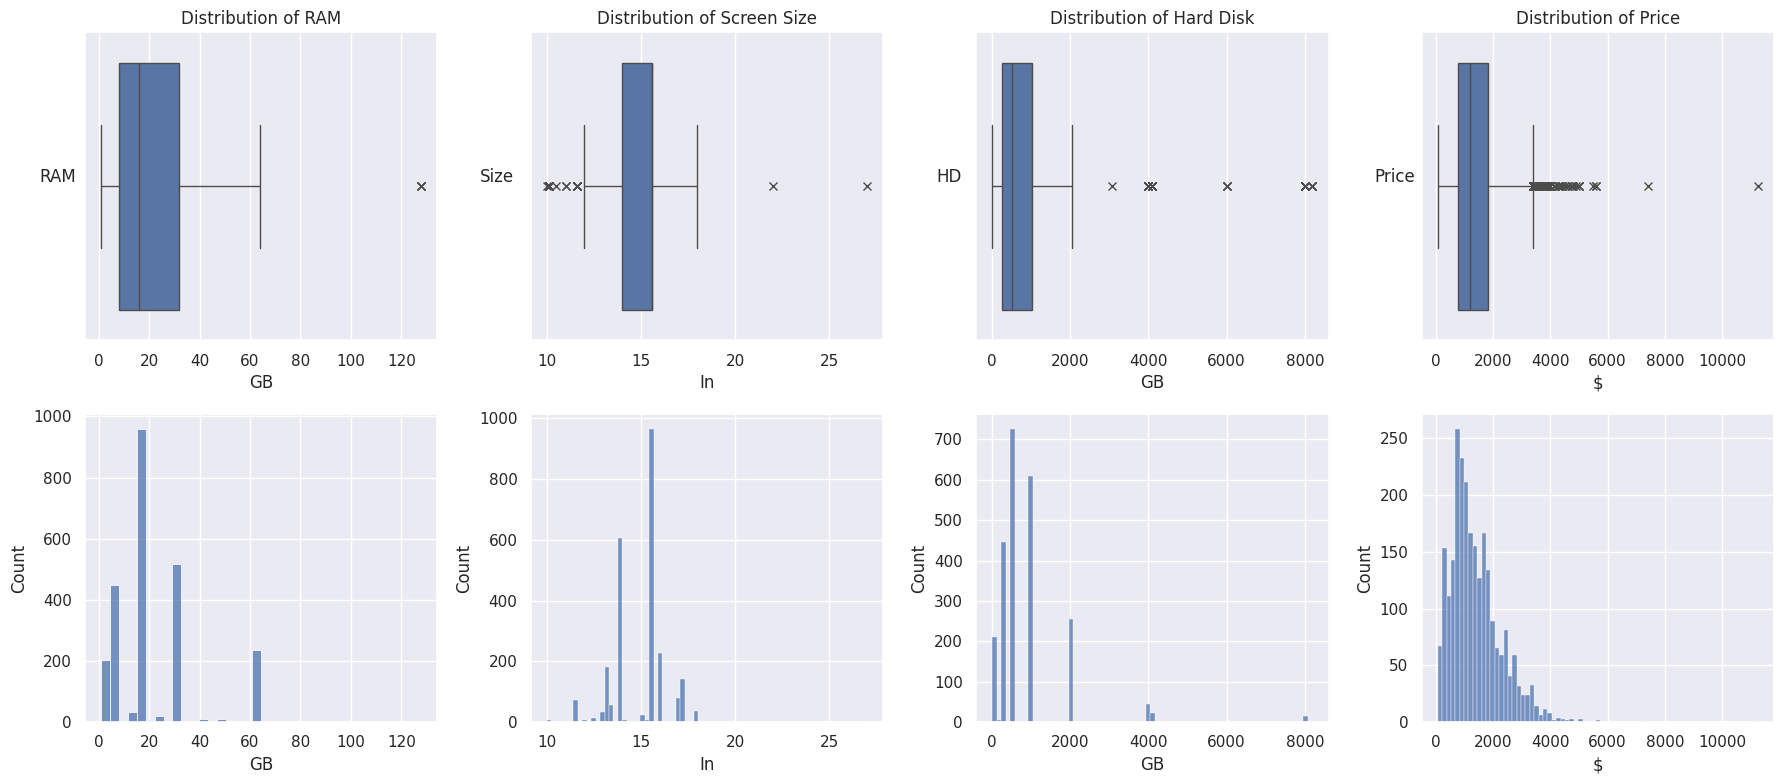

In [40]:
def plotOutlier(laptops, name):
    # Create a figure and subplots
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
    laptops = laptops.replace(0, np.nan)
    # Plot the boxplot for RAM, Screen Size, HDD
    sns.boxplot(data=laptops, x='ram_gb', flierprops={"marker": "x"}, ax=axes[0, 0])
    axes[0, 0].set(xlabel='GB', ylabel='RAM', title='Distribution of RAM')
    axes[0, 0].set_ylabel(axes[0, 0].get_ylabel(), rotation=0, labelpad=10)

    sns.boxplot(data=laptops, x='screen_size_in', flierprops={"marker": "x"}, ax=axes[0, 1])
    axes[0, 1].set(xlabel='In', ylabel='Size', title='Distribution of Screen Size')
    axes[0, 1].set_ylabel(axes[0, 1].get_ylabel(), rotation=0, labelpad=15)

    sns.boxplot(data=laptops, x='harddisk_gb', flierprops={"marker": "x"}, ax=axes[0, 2])
    axes[0, 2].set(xlabel='GB', ylabel='HD', title='Distribution of Hard Disk')
    axes[0, 2].set_ylabel(axes[0, 2].get_ylabel(), rotation=0, labelpad=10)
    
    sns.boxplot(data=laptops, x='price_dollar', flierprops={"marker": "x"}, ax=axes[0, 3])
    axes[0, 3].set(xlabel='$', ylabel='Price', title='Distribution of Price')
    axes[0, 3].set_ylabel(axes[0, 3].get_ylabel(), rotation=0, labelpad=10)
    
    # Plot histograms for RAM, Screen Size, and HDD in the second row
    sns.histplot(data=laptops, x='ram_gb', ax=axes[1, 0])
    axes[1, 0].set(xlabel='GB', ylabel='Count')

    sns.histplot(data=laptops, x='screen_size_in', ax=axes[1, 1])
    axes[1, 1].set(xlabel='In', ylabel='Count')

    sns.histplot(data=laptops, x='harddisk_gb', ax=axes[1, 2])
    axes[1, 2].set(xlabel='GB', ylabel='Count')
    
    sns.histplot(data=laptops, x='price_dollar', ax=axes[1, 3])
    axes[1, 3].set(xlabel='$', ylabel='Count')
    
    plt.tight_layout()
    if FILEPATH:
        plt.savefig(FILEPATH + name + '.png')

plotOutlier(df, 'ram_screen_hdd_outlier')

Remove outliers for RAM, Screen Size and HDD

In [41]:
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'price_dollar']

q1 = df[numericalData].quantile(0.25)
q3 = df[numericalData].quantile(0.75)
iqr = q3 - q1

df = df[~((df[numericalData] < (q1 - 1.5 * iqr)) |(df[numericalData] > (q3 + 1.5 * iqr))).any(axis=1)]

change = ['ram_gb', 'screen_size_in', 'harddisk_gb', 'price_dollar']
df[change]

,ram_gb,screen_size_in,harddisk_gb,price_dollar
0,16,14.0,256,1000.00
1,64,15.6,2048,1000.00
2,32,15.6,1000,1000.99
3,64,14.0,2000,1001.11
4,64,14.0,2000,1001.11
...,...,...,...,...
2520,8,14.0,256,NaN
2521,4,15.0,128,NaN
2522,8,12.4,256,NaN
2523,16,13.3,512,NaN


Show same plot after removing outliers

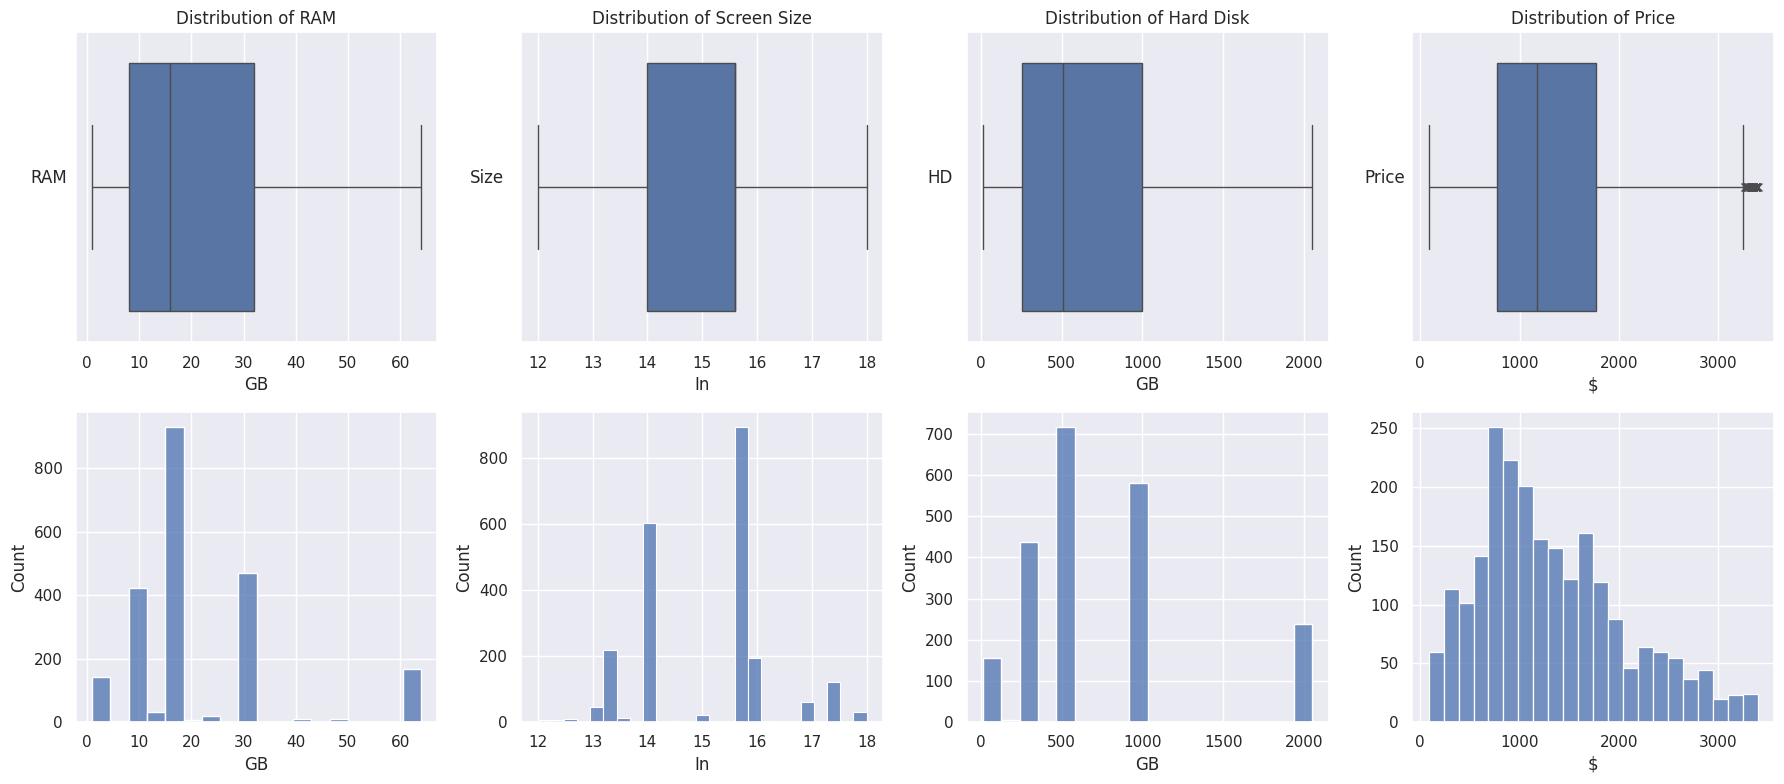

In [42]:
plotOutlier(df, 'ram_screen_hdd_nooutlier')

Plot brand, color count

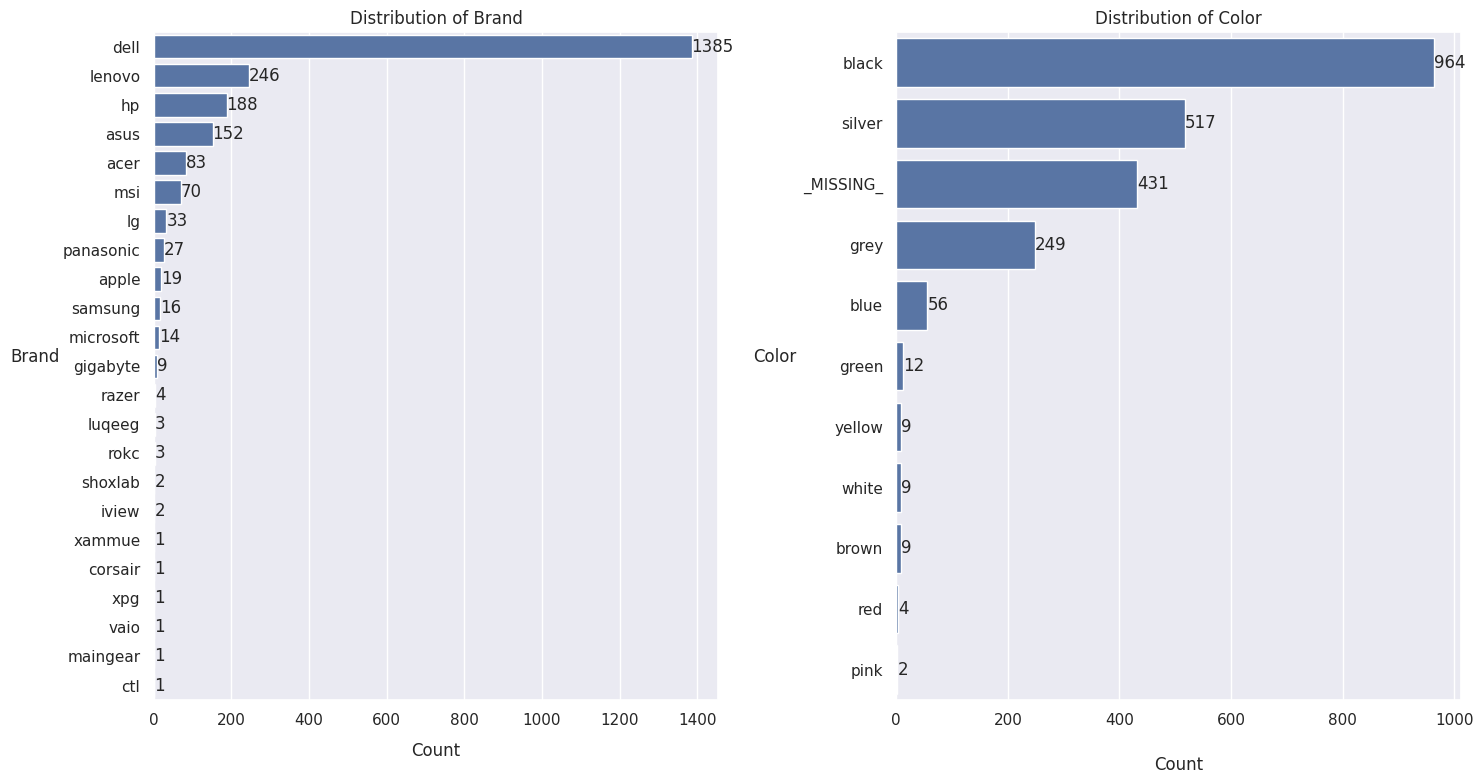

In [43]:
def plotGroupCount1(laptops, name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
    
    # Plot countplots for brand, color
    rotation = 45
    label = ['Brand', 'Color']
    if laptops['brand'].nunique() < 15:
        for i in range(len(label)):
            label[i] += ' \n(Above 1%)'
    sns.countplot(data=laptops, y='brand', order=laptops['brand'].value_counts().index, ax=axes[0])
    axes[0].set(ylabel=label[0], xlabel='Count', title='Distribution of Brand')
    axes[0].set_ylabel(axes[0].get_ylabel(), rotation=0, labelpad=20)
    axes[0].set_xlabel(axes[0].get_xlabel(), rotation=0, labelpad=10)
    axes[0].bar_label(axes[0].containers[0])
    
    sns.countplot(data=laptops, y='color', order=laptops['color'].value_counts().index, ax=axes[1])
    axes[1].set(ylabel=label[1], xlabel='Count', title='Distribution of Color')
    axes[1].set_ylabel(axes[1].get_ylabel(), rotation=0, labelpad=20)
    axes[1].set_xlabel(axes[1].get_xlabel(), rotation=0, labelpad=20)
    axes[1].bar_label(axes[1].containers[0])
    
    plt.tight_layout()
    if FILEPATH:
        plt.savefig(FILEPATH + name + '.png')
    
plotGroupCount1(df, 'brand_color_pregrouping')

Plot cpu/gpu brand, and OS count

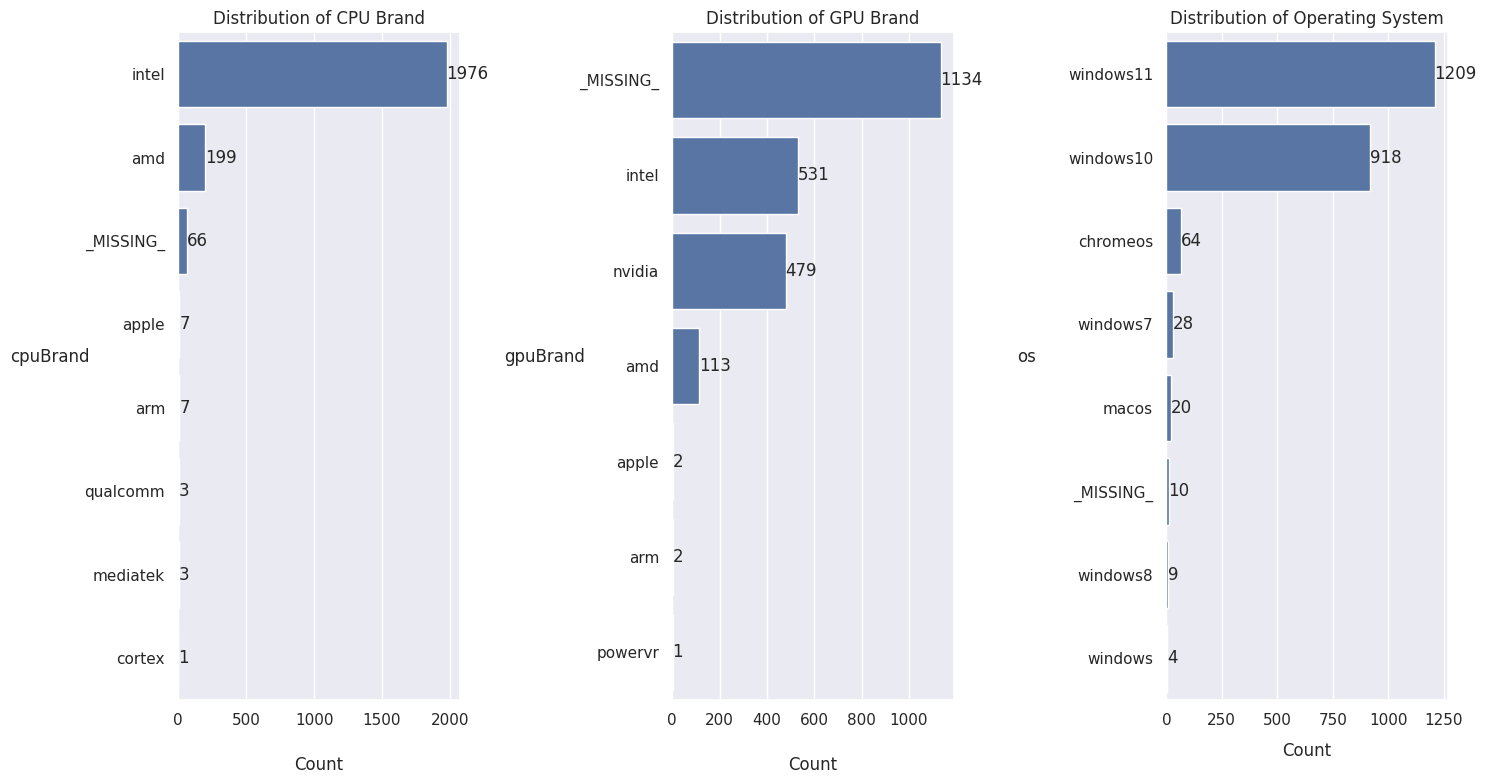

In [44]:
def plotGroupCount2(laptops, name):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
    
    label = ['cpuBrand', 'gpuBrand', 'os']
    if laptops['cpuBrand'].nunique() < 5:
        for i in range(len(label)):
            label[i] += ' \n(Above 1%)'
        
    # Plot countplots for cpuBrand, gpuBrand, OS
    sns.countplot(data=laptops, y='cpuBrand', order=laptops['cpuBrand'].value_counts().index, ax=axes[0])
    axes[0].set(ylabel=label[0], xlabel='Count', title='Distribution of CPU Brand')
    axes[0].set_ylabel(axes[0].get_ylabel(), rotation=0, labelpad=25)
    axes[0].set_xlabel(axes[0].get_xlabel(), rotation=0, labelpad=20)
    axes[0].bar_label(axes[0].containers[0])

    sns.countplot(data=laptops, y='gpuBrand', order=laptops['gpuBrand'].value_counts().index, ax=axes[1])
    axes[1].set(ylabel=label[1], xlabel='Count', title='Distribution of GPU Brand')
    axes[1].set_ylabel(axes[1].get_ylabel(), rotation=0, labelpad=25)
    axes[1].set_xlabel(axes[1].get_xlabel(), rotation=0, labelpad=20)
    axes[1].bar_label(axes[1].containers[0])
    
    sns.countplot(data=laptops, y='os', order=laptops['os'].value_counts().index, ax=axes[2])
    axes[2].set(ylabel=label[2], xlabel='Count', title='Distribution of Operating System')
    axes[2].set_ylabel(axes[2].get_ylabel(), rotation=0, labelpad=30)
    axes[2].set_xlabel(axes[2].get_xlabel(), rotation=0, labelpad=10)
    axes[2].bar_label(axes[2].containers[0])

    plt.tight_layout()
    if FILEPATH:
        plt.savefig(FILEPATH + name + '.png')
        
plotGroupCount2(df, 'cpu_gpu_brand_os_pregrouping')

Group brand, color and os into an 'others' category. Missing counts as 'others'

In [45]:
change = ['brand', 'color', 'os', 'cpuBrand', 'gpuBrand']
for col in change:
    df.loc[df.groupby(col).brand.transform('count').lt(df[col].count() * 0.01), col] = 'others' # If group is less than 1% of total count, put into others
df[change]

,brand,color,os,cpuBrand,gpuBrand
0,hp,silver,windows10,intel,_MISSING_
1,dell,black,windows11,intel,intel
2,dell,black,windows10,intel,_MISSING_
3,dell,grey,windows11,intel,intel
4,dell,silver,windows11,intel,intel
...,...,...,...,...,...
2520,dell,black,windows10,intel,_MISSING_
2521,hp,grey,windows11,intel,_MISSING_
2522,others,others,windows10,intel,intel
2523,dell,_MISSING_,windows10,intel,intel


Same plot after grouping values

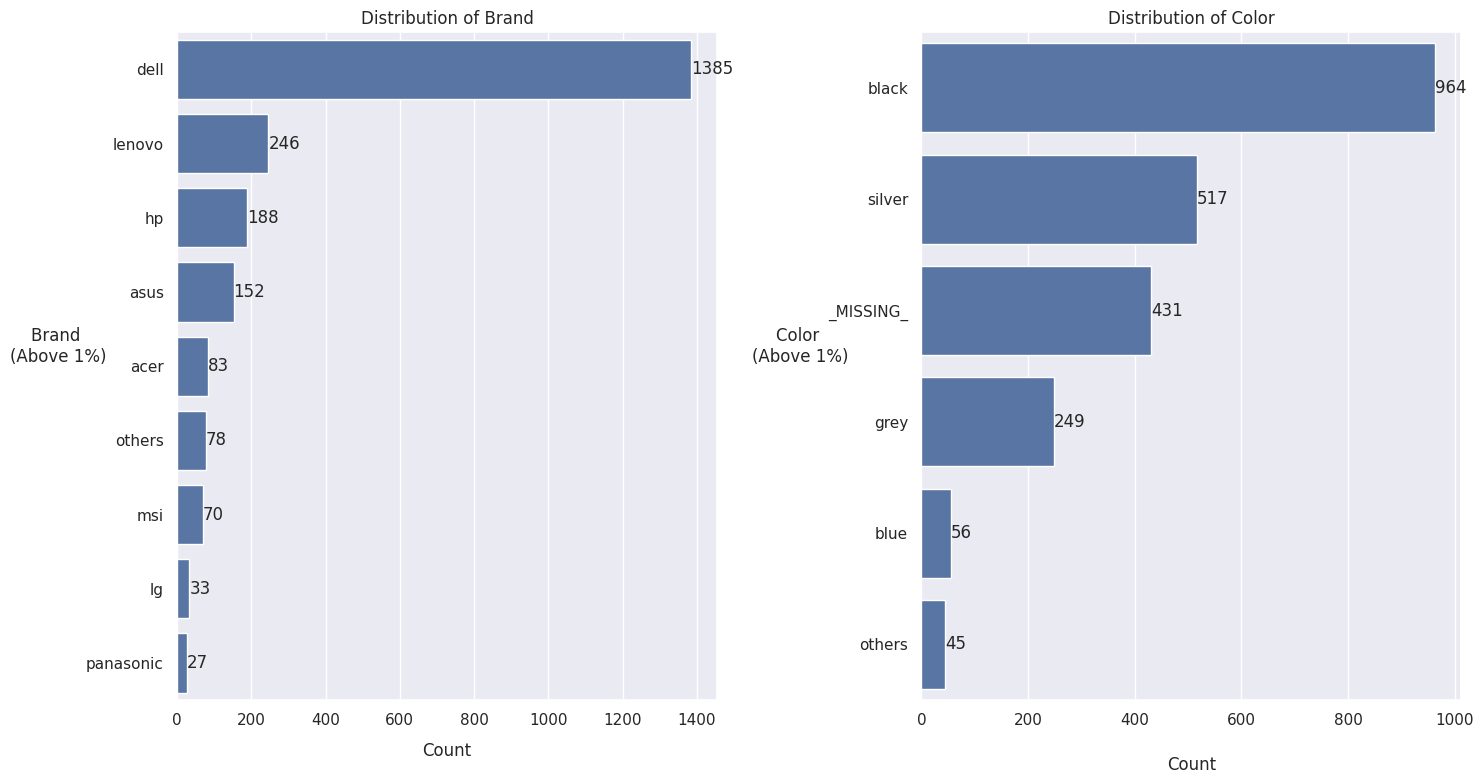

In [46]:
plotGroupCount1(df, 'brand_color_postgrouping')

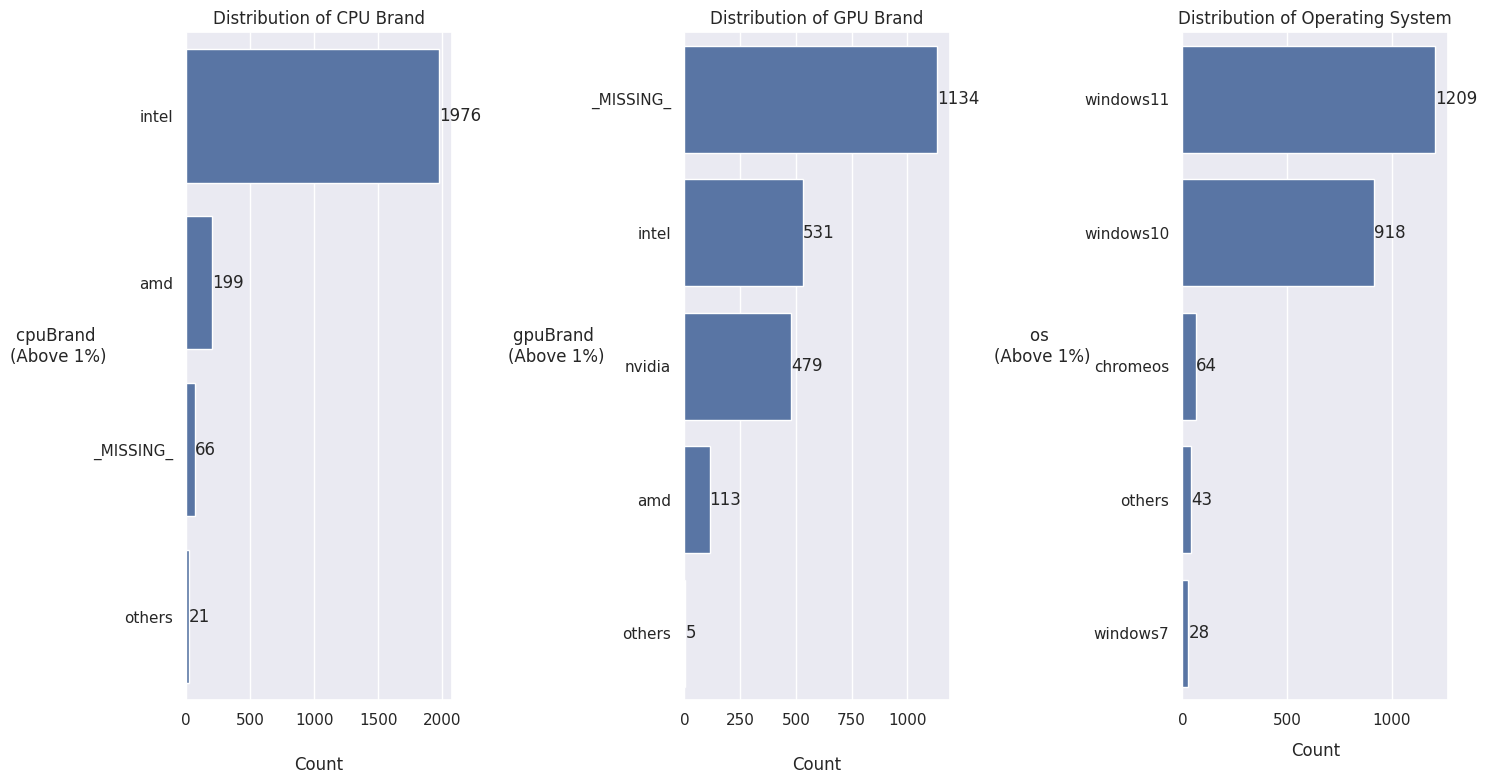

In [47]:
plotGroupCount2(df, 'cpu_gpu_brand_os_postgrouping')

Plot CPU speed

/tmp/ipykernel_194411/1371163299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptops['cpu_speed_ghz'] = laptops['cpu_speed_ghz'].fillna('NAN')


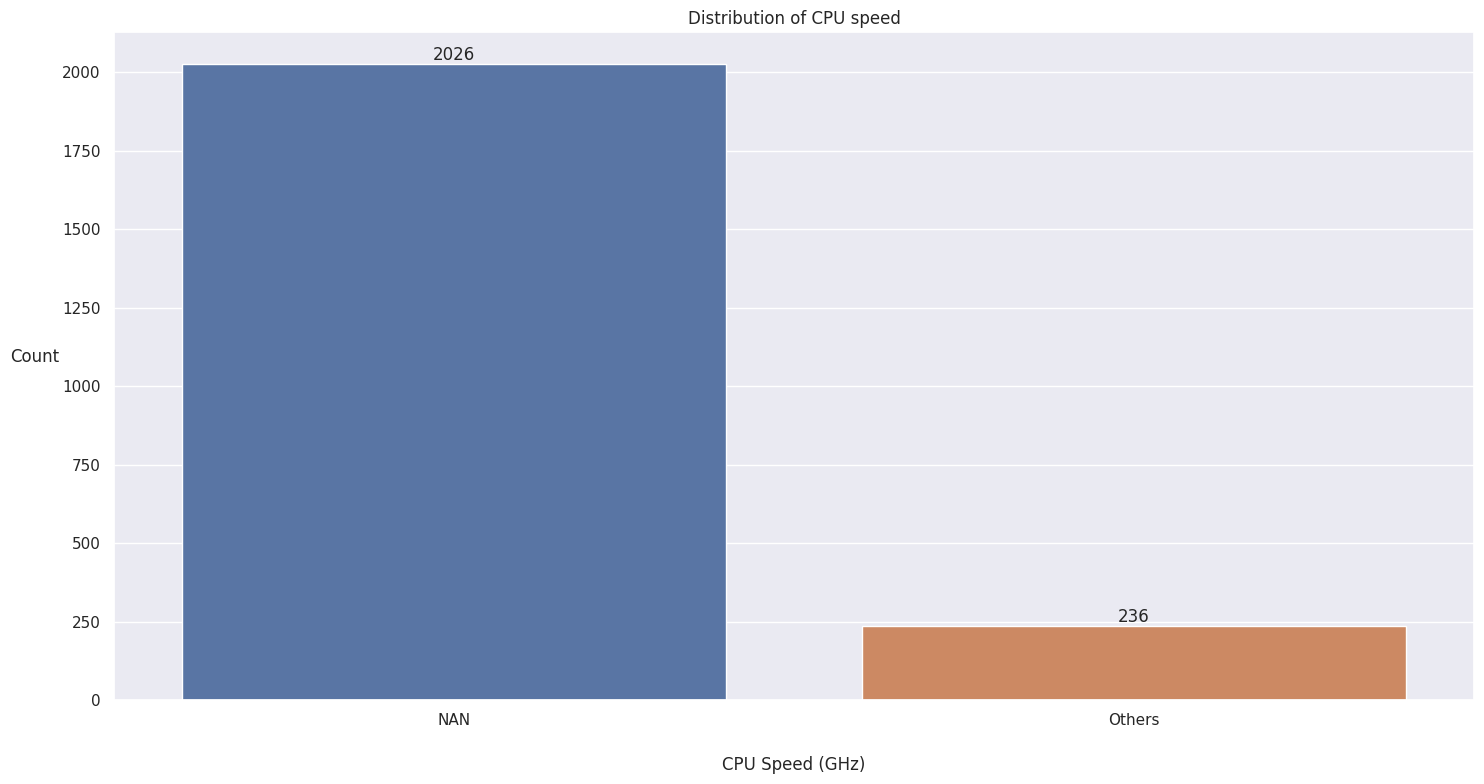

In [48]:
def plotDropCount(laptops):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    
    laptops['cpu_speed_ghz'] = laptops['cpu_speed_ghz'].fillna('NAN')
    laptops.loc[laptops['cpu_speed_ghz'] != 'NAN', 'cpu_speed_ghz'] = 'Others'
    sns.countplot(data=laptops, x='cpu_speed_ghz', hue='cpu_speed_ghz', ax=axes)
    axes.set(xlabel='CPU Speed (GHz)', ylabel='Count', title='Distribution of CPU speed')
    axes.set_ylabel(axes.get_ylabel(), rotation=0, labelpad=20)
    axes.set_xlabel(axes.get_xlabel(), rotation=0, labelpad=20)
    axes.bar_label(axes.containers[0])
    axes.bar_label(axes.containers[1])

    plt.tight_layout()
    
    if FILEPATH:
        plt.savefig(FILEPATH + 'cpu_speed_sparce.png')

if 'cpu_speed_ghz' in df:
    plotDropCount(df)

Drop CPU speed column as there is not enough values

In [49]:
df = df.drop(columns=['cpu_speed_ghz'], axis = 1)
df

,brand,model,screen_size_in,color,harddisk_gb,cpuBrand,cpuModel,ram_gb,os,special_features,graphics,gpuBrand,gpuModel,rating,price_dollar
0,hp,elitebook 840,14.0,silver,256,intel,core i5 6200u,16,windows10,"(anti-glare,)",integrated,_MISSING_,_MISSING_,4.0,1000.00
1,dell,inspiron 15 3530,15.6,black,2048,intel,core i7,64,windows11,(),integrated,intel,iris,4.2,1000.00
2,dell,vostro 3510,15.6,black,1000,intel,core i7,32,windows10,"(wifi and bluetooth,)",integrated,_MISSING_,_MISSING_,NaN,1000.99
3,dell,inspiron 7420,14.0,grey,2000,intel,core i5,64,windows11,"(2-in-1,)",integrated,intel,_MISSING_,NaN,1001.11
4,dell,inspiron 7420,14.0,silver,2000,intel,core i5,64,windows11,"(2-in-1,)",integrated,intel,_MISSING_,NaN,1001.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,dell,latitude 5404,14.0,black,256,intel,core i7,8,windows10,"(backlit keyboard,)",integrated,_MISSING_,_MISSING_,4.3,NaN
2521,hp,s13,15.0,grey,128,intel,pentium,4,windows11,"(hd audio,)",integrated,_MISSING_,_MISSING_,4.3,NaN
2522,others,surface go 2,12.4,others,256,intel,core i5 1135g7,8,windows10,(),integrated,intel,iris,NaN,NaN
2523,dell,latitude 5300,13.3,_MISSING_,512,intel,core i5 8250u,16,windows10,"(stereo speakers,)",integrated,intel,_MISSING_,4.2,NaN


Plot Hard Disk

/tmp/ipykernel_194411/4237229098.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


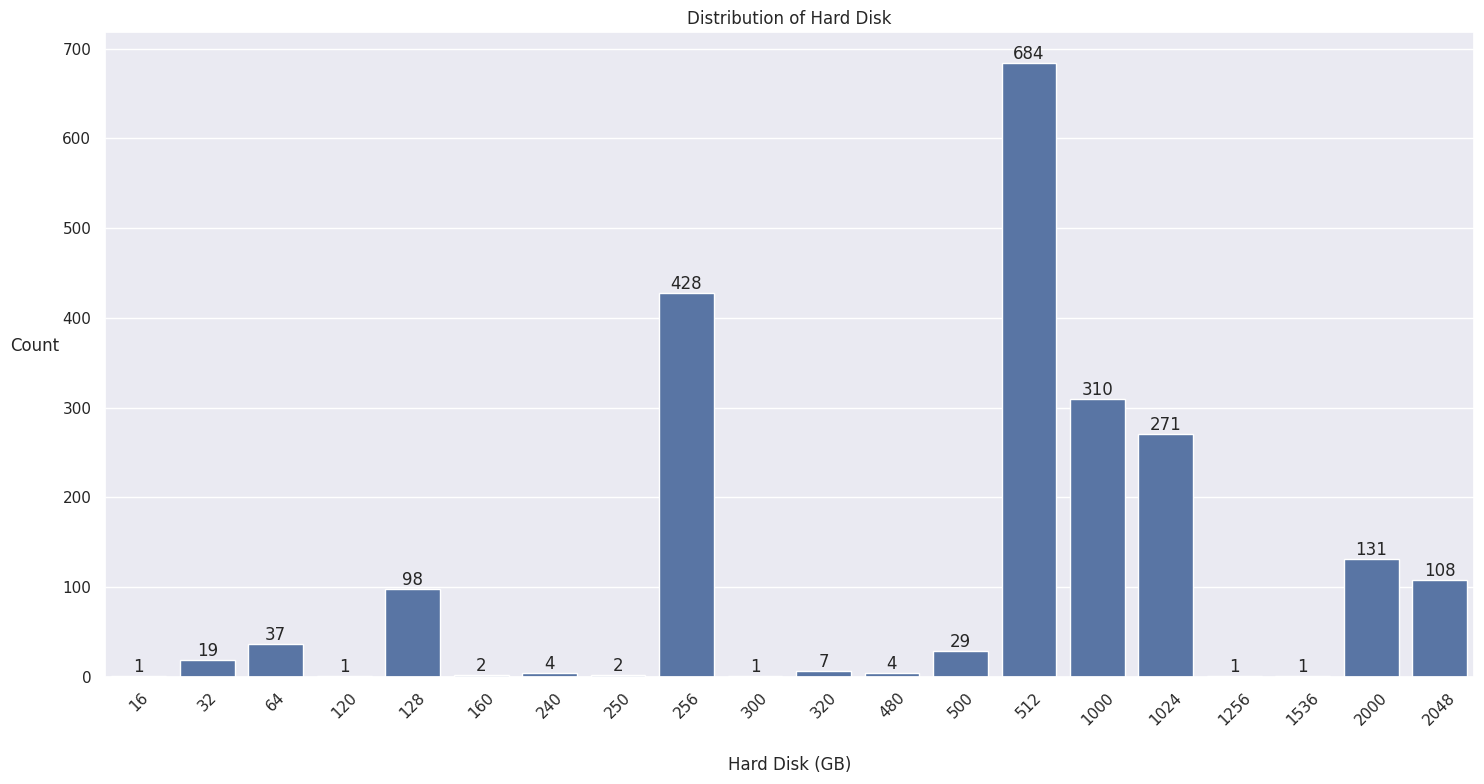

In [50]:
def plotBins(laptops, name):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
        
    col = 'harddisk_gb'
    data = laptops[(laptops['harddisk_gb'] >= 0) & (laptops['harddisk_gb'] <= 2048)]
        
    sns.countplot(data=data, x=col, ax=axes)
    axes.set(xlabel='Hard Disk (GB)', ylabel='Count', title='Distribution of Hard Disk')
    axes.set_ylabel(axes.get_ylabel(), rotation=0, labelpad=20)
    axes.set_xlabel(axes.get_xlabel(), rotation=0, labelpad=20)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    axes.bar_label(axes.containers[0])

    plt.tight_layout()
    if FILEPATH:
        plt.savefig(FILEPATH + name + '.png')
        
plotBins(df, 'hdd_prebin')

Bin Hard Disk values

In [51]:
df.loc[df['harddisk_gb'] == 65, 'harddisk_gb'] = 64
bins = [16, 32, 64, 128, 256, 512, 1024, 2048, np.inf]
df['harddisk_gb'] = pd.cut(df['harddisk_gb'], bins=bins, labels=bins[:-1], right=False)
df['harddisk_gb'] = df['harddisk_gb'].astype('Int64')
df['harddisk_gb']

0        256
1       2048
2        512
3       1024
4       1024
        ... 
2520     256
2521     128
2522     256
2523     512
2524    <NA>
Name: harddisk_gb, Length: 2262, dtype: Int64

Same plot after binning

/tmp/ipykernel_194411/4237229098.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=45)


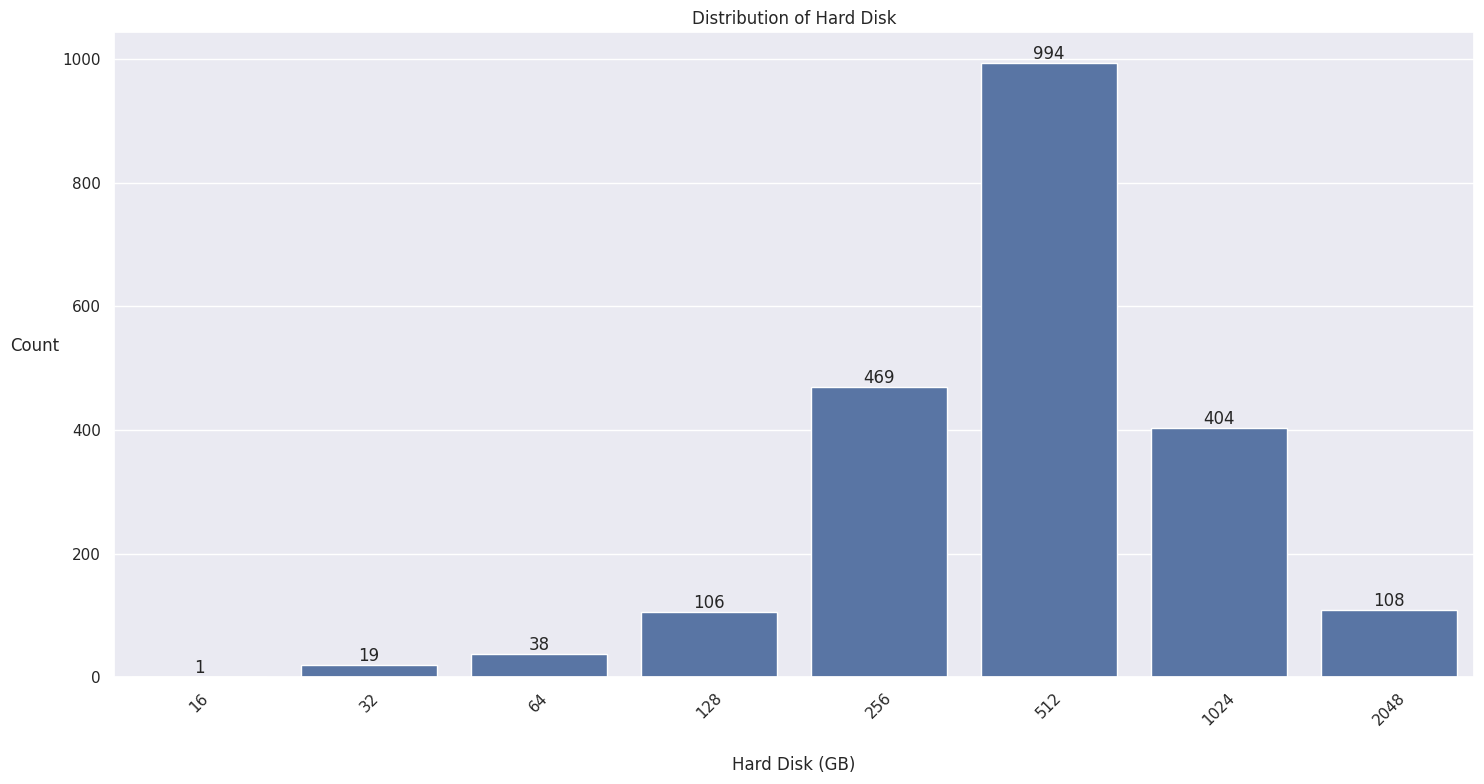

In [52]:
plotBins(df, 'hdd_postbin')

Plot types of graphics vs price

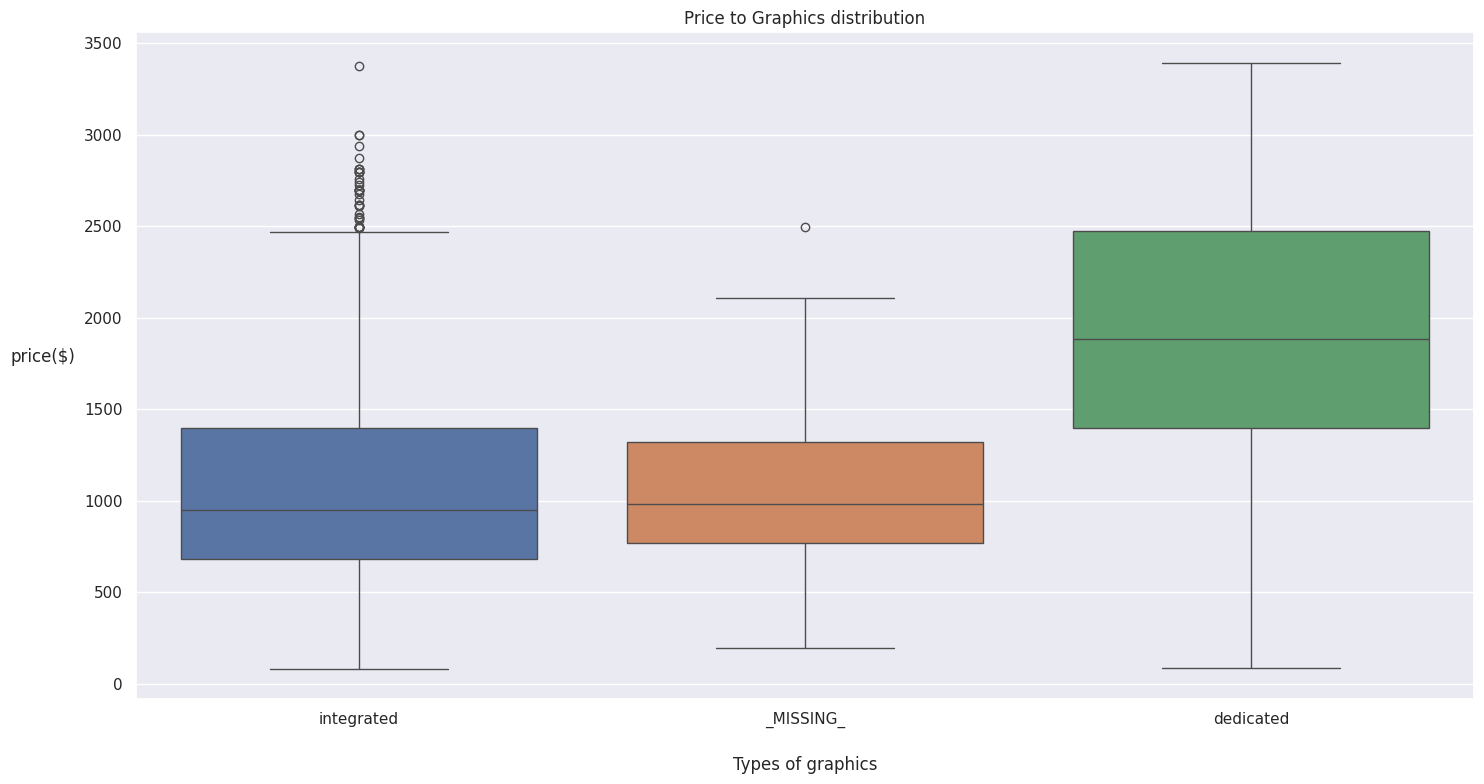

In [53]:
def plotGraphicsPrice(laptops, name):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    sns.boxplot(data=df[df['price_dollar'] < 6000], x='graphics', y='price_dollar', hue='graphics')
    axes.set(xlabel='Types of graphics', ylabel='price($)', title='Price to Graphics distribution')
    axes.set_ylabel(axes.get_ylabel(), rotation=0, labelpad=30)
    axes.set_xlabel(axes.get_xlabel(), rotation=0, labelpad=20)

    plt.tight_layout()
    if FILEPATH:
        plt.savefig(FILEPATH + name + '.png')

plotGraphicsPrice(df, 'graphics_to_price_missing')

Convert all missing graphics types to integrated

In [54]:
df.loc[df['graphics'] == MISSINGCATEGORICAL, 'graphics'] = 'integrated'

Plot graph after filling in missing value

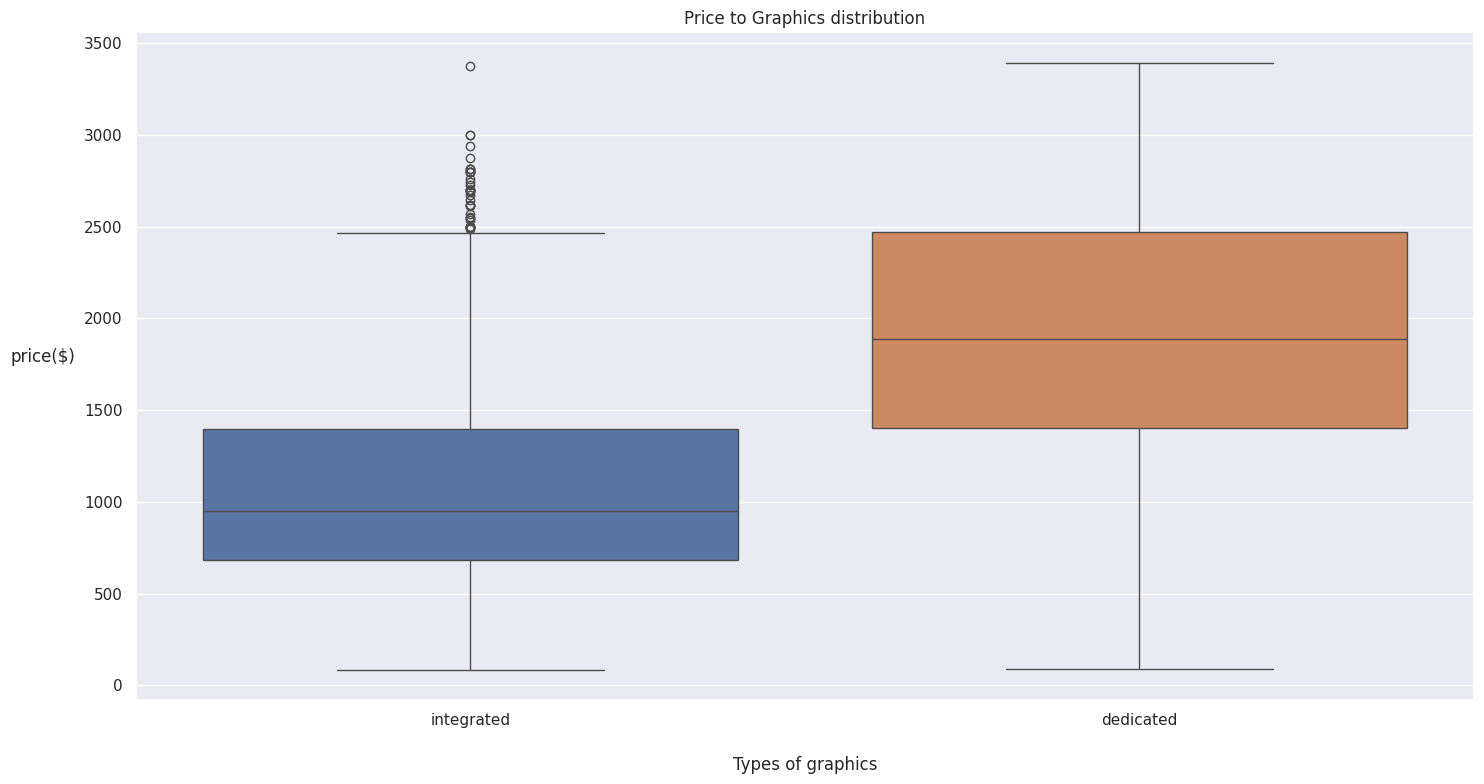

In [55]:
plotGraphicsPrice(df, 'graphics_to_price_no_missing')

Since the column is either integrated or dedicated, make it a boolean

In [56]:
df.loc[df['graphics'] == 'integrated', 'graphics'] = 0
df.loc[df['graphics'] == 'dedicated', 'graphics'] = 1
df['graphics'] = df['graphics'].astype('bool')
df = df.rename(columns={
    "graphics": "graphics_dedicated", 
})
df['graphics_dedicated']

0       False
1       False
2       False
3       False
4       False
        ...  
2520    False
2521    False
2522    False
2523    False
2524    False
Name: graphics_dedicated, Length: 2262, dtype: bool

Save cleaned data to another file

In [57]:
df.to_excel('amazon_laptop_2023_cleaned.xlsx', index=False)

# Data exploration and analysis

Explore correlations

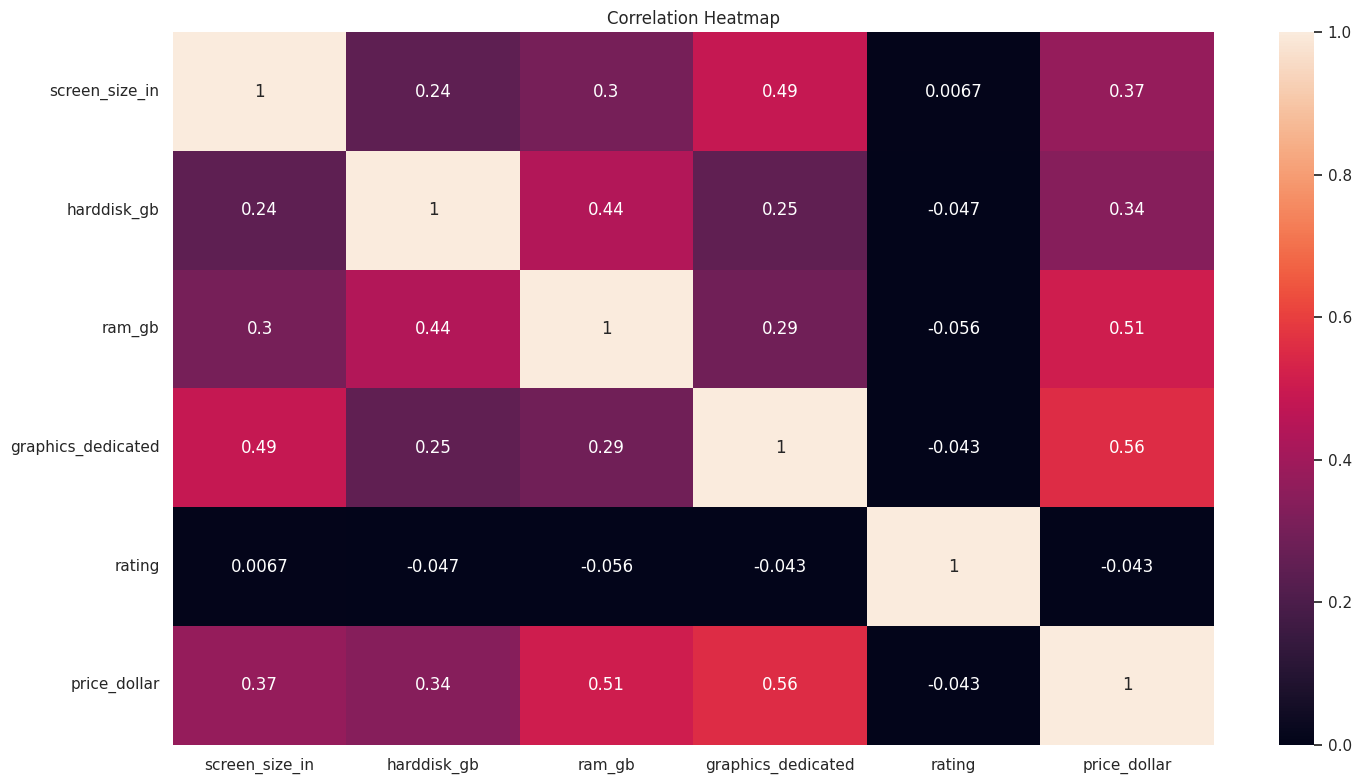

In [58]:
plt.figure(figsize=(15, 8))
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'graphics_dedicated', 'rating', 'price_dollar']
heatmap = sns.heatmap(df[numericalData].corr(), vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'correlation_heatmap' + '.png')

Plot price correlation

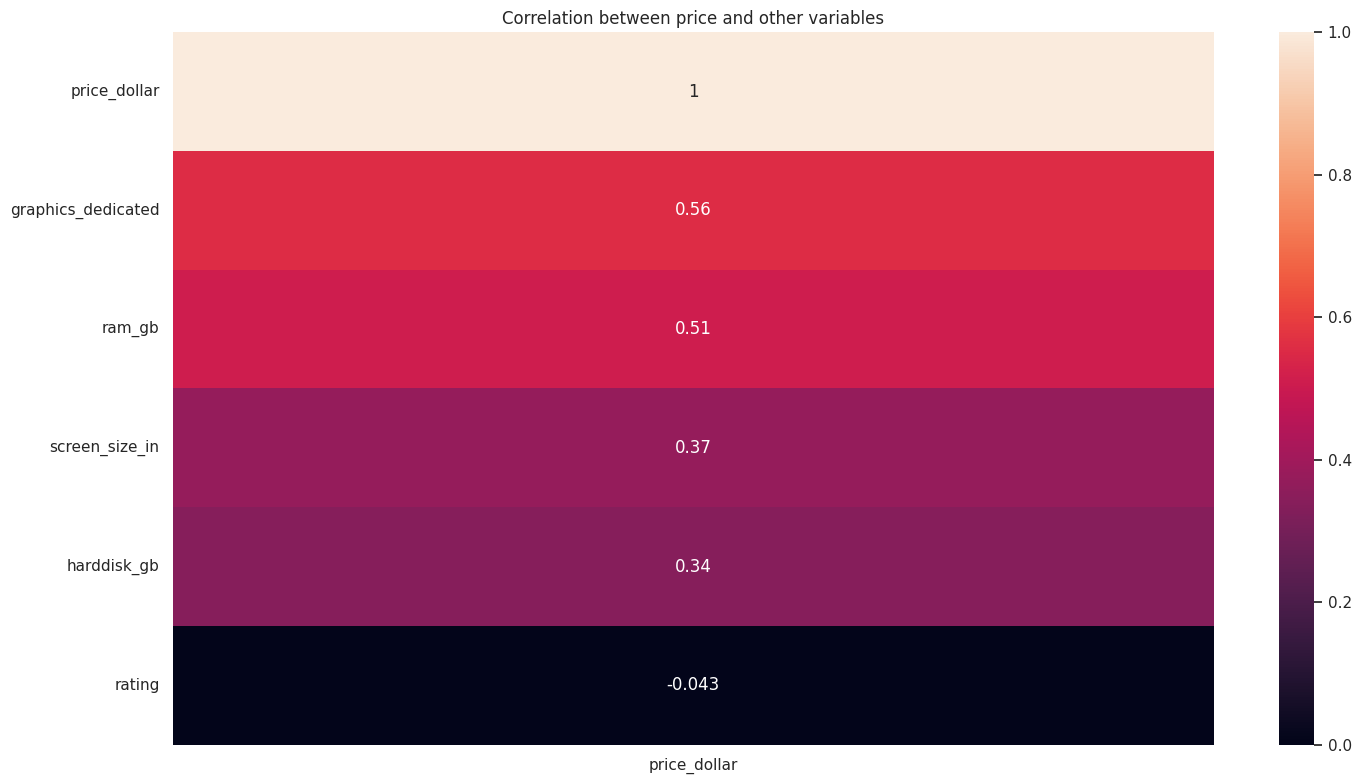

In [59]:
plt.figure(figsize=(15, 8))
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'graphics_dedicated', 'rating', 'price_dollar']
heatmap = sns.heatmap(df[numericalData].corr()[['price_dollar']].sort_values(by='price_dollar', ascending=False), vmin=0, vmax=1, annot=True)
heatmap.set(title='Correlation between price and other variables')
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'correlation_price' + '.png')

Plot screen size correlation

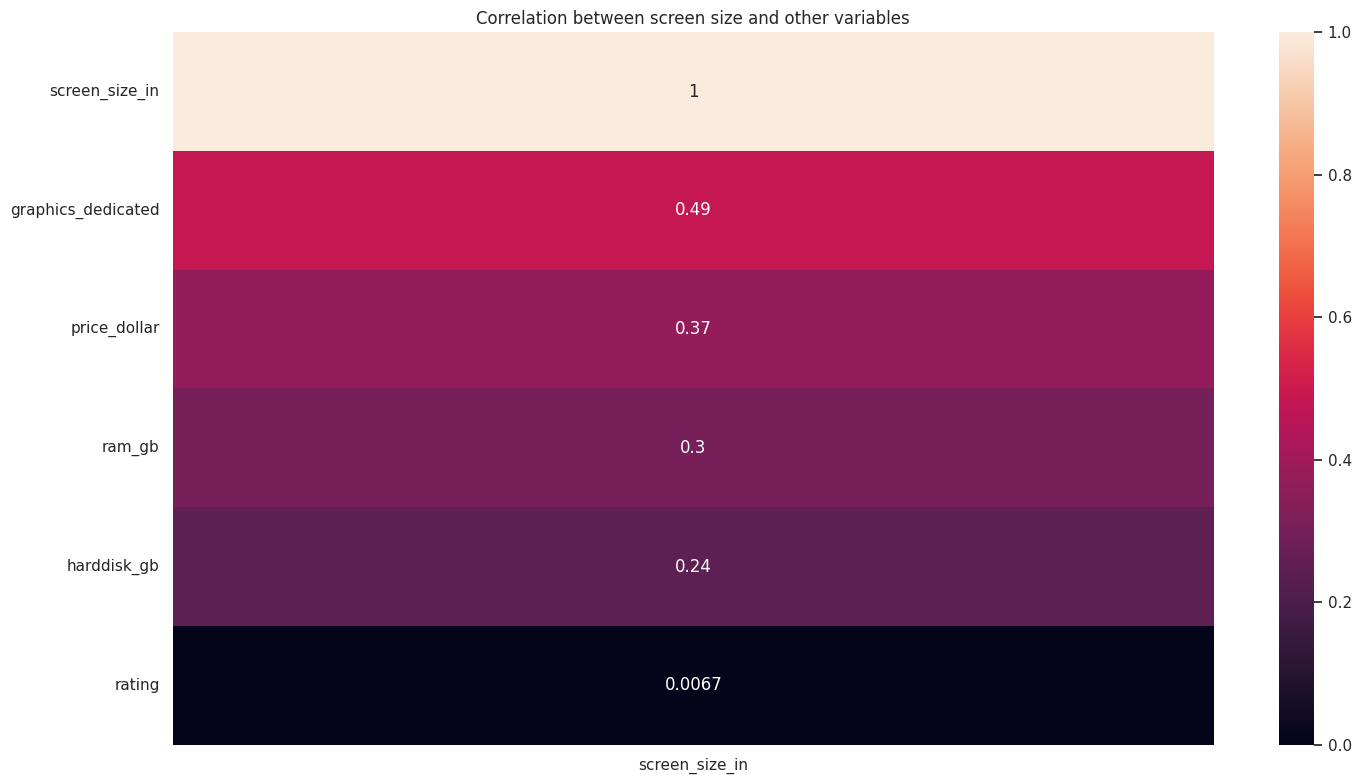

In [60]:
plt.figure(figsize=(15, 8))
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'graphics_dedicated', 'rating', 'price_dollar']
heatmap = sns.heatmap(df[numericalData].corr()[['screen_size_in']].sort_values(by='screen_size_in', ascending=False), vmin=0, vmax=1, annot=True)
heatmap.set(title='Correlation between screen size and other variables')
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'correlation_screen' + '.png')

Plot cpu brand correlation

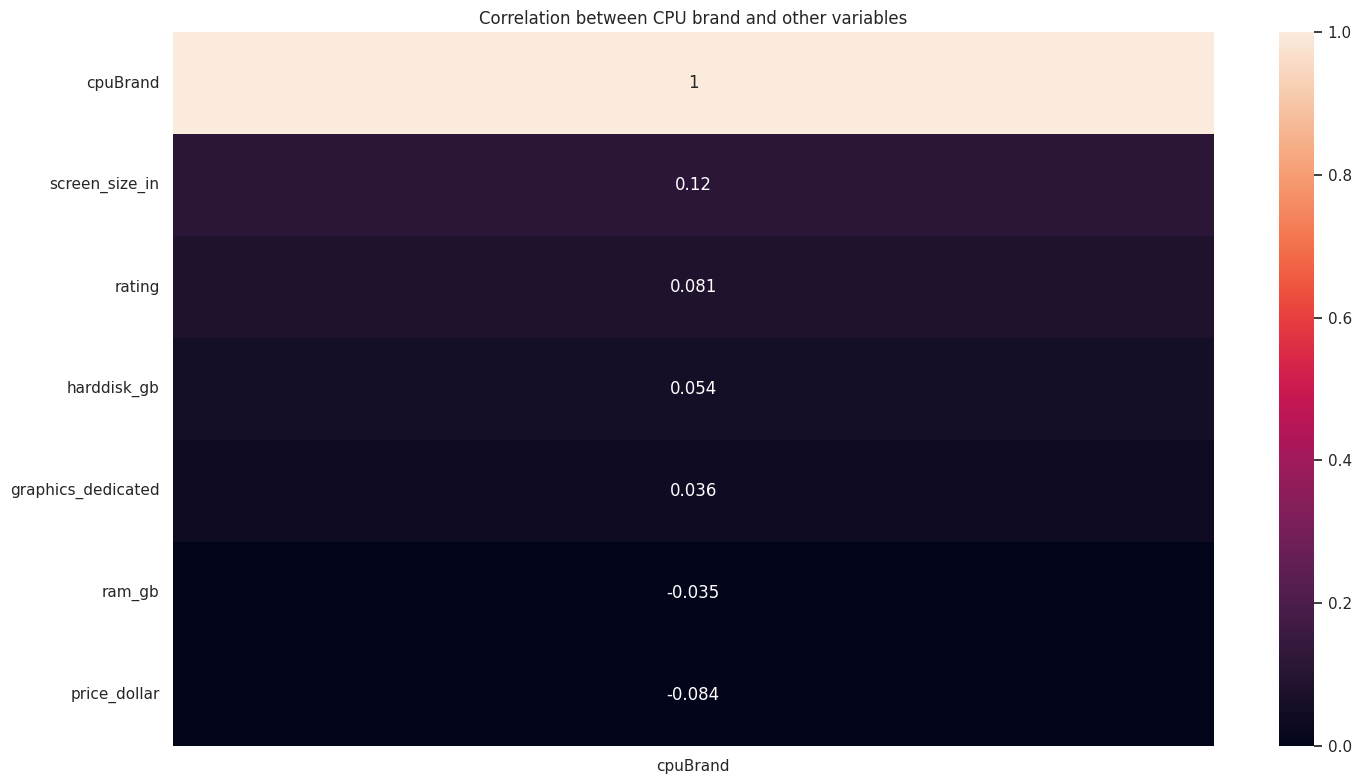

In [61]:
plt.figure(figsize=(15, 8))
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'graphics_dedicated', 'cpuBrand', 'rating', 'price_dollar']
dfnew = df.copy()
dfnew.loc[dfnew['cpuBrand'] == 'intel', 'cpuBrand'] = 0
dfnew.loc[dfnew['cpuBrand'] == 'amd', 'cpuBrand'] = 1
dfnew.loc[dfnew['cpuBrand'] == MISSINGCATEGORICAL, 'cpuBrand'] = np.nan
dfnew.loc[dfnew['cpuBrand'] == 'others', 'cpuBrand'] = np.nan
heatmap = sns.heatmap(dfnew[numericalData].corr()[['cpuBrand']].sort_values(by='cpuBrand', ascending=False), vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation between CPU brand and other variables')
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'correlation_cpuBrand' + '.png')

Plot ratings correlation

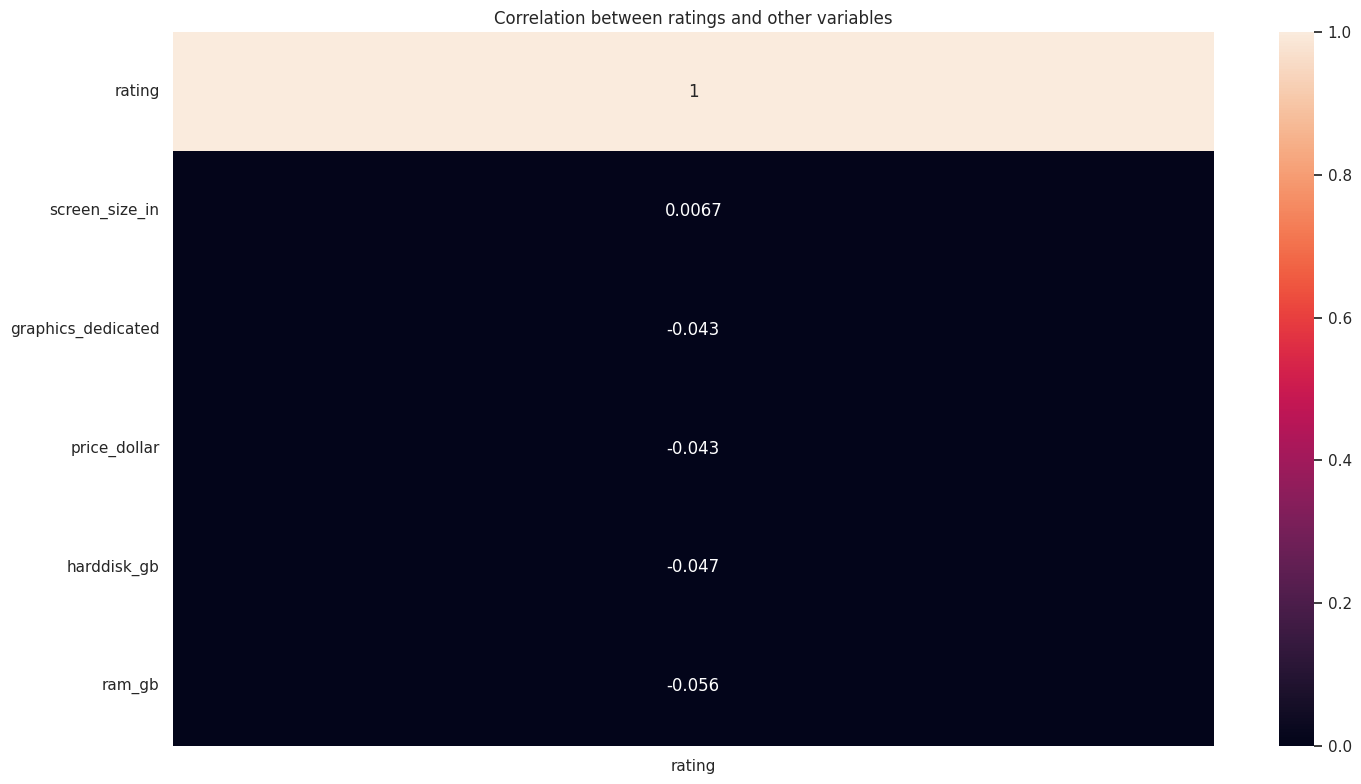

In [62]:
plt.figure(figsize=(15, 8))
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'graphics_dedicated', 'rating', 'price_dollar']
heatmap = sns.heatmap(df[numericalData].corr()[['rating']].sort_values(by='rating', ascending=False), vmin=0, vmax=1, annot=True)
heatmap.set(title='Correlation between ratings and other variables')
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'correlation_ratings' + '.png')

Plot ram, storage correlation

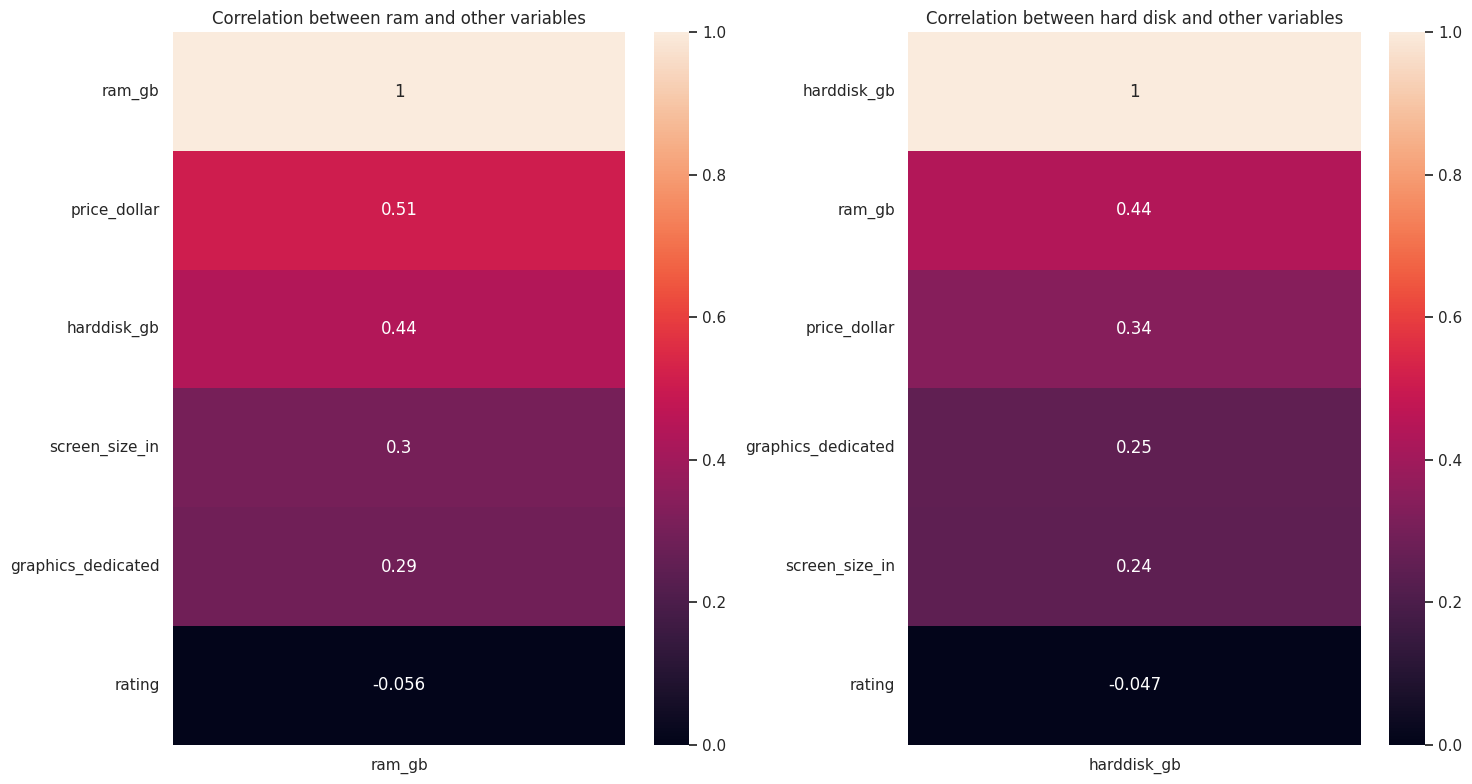

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
numericalData = ['screen_size_in', 'harddisk_gb', 'ram_gb', 'graphics_dedicated', 'rating', 'price_dollar']
heatmap1 = sns.heatmap(df[numericalData].corr()[['ram_gb']].sort_values(by='ram_gb', ascending=False), vmin=0, vmax=1, annot=True, ax=axes[0])
heatmap1.set(title='Correlation between ram and other variables')
heatmap2 = sns.heatmap(df[numericalData].corr()[['harddisk_gb']].sort_values(by='harddisk_gb', ascending=False), vmin=0, vmax=1, annot=True, ax=axes[1])
heatmap2.set(title='Correlation between hard disk and other variables')
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'correlation_ram_hdd' + '.png')

Remove all laptops more than 1.5k

In [64]:
df = df[df['price_dollar'] <= 1500]

Query customer 1

In [65]:
df.loc[(df['graphics_dedicated'] == True) &
       (df['screen_size_in'] >= 15.6) &
       (df['gpuBrand'].isin(['nvidia', 'amd'])) &
       (df['cpuBrand'].isin(['amd', MISSINGCATEGORICAL])) &
       (df['ram_gb'] >= 16) &
       (df['harddisk_gb'] > 512)].sort_values(by='price_dollar')

,brand,model,screen_size_in,color,harddisk_gb,cpuBrand,cpuModel,ram_gb,os,special_features,graphics_dedicated,gpuBrand,gpuModel,rating,price_dollar
170,asus,tuf gaming a15,15.6,grey,1024,amd,ryzen 7,16,windows11,(),True,nvidia,rtx 4050,4.3,1149.00
343,hp,omen,15.6,black,1024,_MISSING_,_MISSING_,16,windows10,"(backlit keyboard,)",True,nvidia,gtx 1060,4.1,1299.00
445,asus,vivobook pro 15,15.6,blue,1024,amd,ryzen 9,32,windows11,(),True,nvidia,rtx 4060,4.6,1399.99
457,dell,g15 5525,15.6,grey,1024,amd,ryzen 7,32,windows11,(),True,nvidia,rtx 3050 ti,NaN,1409.99
505,others,m15r5,15.6,black,1024,amd,ryzen 9,32,windows11,(),True,nvidia,rtx 3070,4.0,1479.00


Query customer 2

In [66]:
allButPrice = list(df)
allButPrice.remove('price_dollar')
dftemp = df.drop_duplicates(subset=allButPrice, keep='first')
dftemp.loc[(df['graphics_dedicated'] == False) &
       (df['screen_size_in'] <= 15.6) &
       (df['gpuBrand'].isin(['intel', 'amd', MISSINGCATEGORICAL, 'others'])) &
       (df['cpuBrand'].isin(['intel', MISSINGCATEGORICAL])) &
       (df['ram_gb'].isin([8, 16])) &
       (df['harddisk_gb'] >= 1024) &
       (df['rating'] >= 4.5)].sort_values(by='price_dollar')

,brand,model,screen_size_in,color,harddisk_gb,cpuBrand,cpuModel,ram_gb,os,special_features,graphics_dedicated,gpuBrand,gpuModel,rating,price_dollar
1864,hp,envy,14.0,_MISSING_,1024,intel,core i3,8,windows10,"(backlit keyboard, fingerprint reader)",False,intel,hd 520,4.6,587.99
2236,msi,modern 14 c13m-621us,14.0,silver,1024,intel,core i7,16,windows11,(),False,intel,iris,5.0,839.99
2309,dell,latitude,15.6,_MISSING_,1024,intel,core i5,8,windows11,(),False,intel,iris,4.5,885.99
138,dell,precision,13.4,_MISSING_,1024,intel,core i7,16,windows10,"(fingerprint reader,)",False,_MISSING_,_MISSING_,4.7,1101.34
358,dell,xps 13 9320,13.4,silver,1024,intel,core i7,16,windows11,"(backlit keyboard, fingerprint reader)",False,_MISSING_,_MISSING_,5.0,1305.17
404,lenovo,thinkpad,14.0,black,1024,intel,core i7,16,windows10,"(backlit keyboard,)",False,_MISSING_,_MISSING_,4.7,1356.00
476,dell,latitude,15.6,_MISSING_,2048,intel,core i5,16,windows10,(),False,intel,iris,5.0,1436.81


Plot screen size distribution

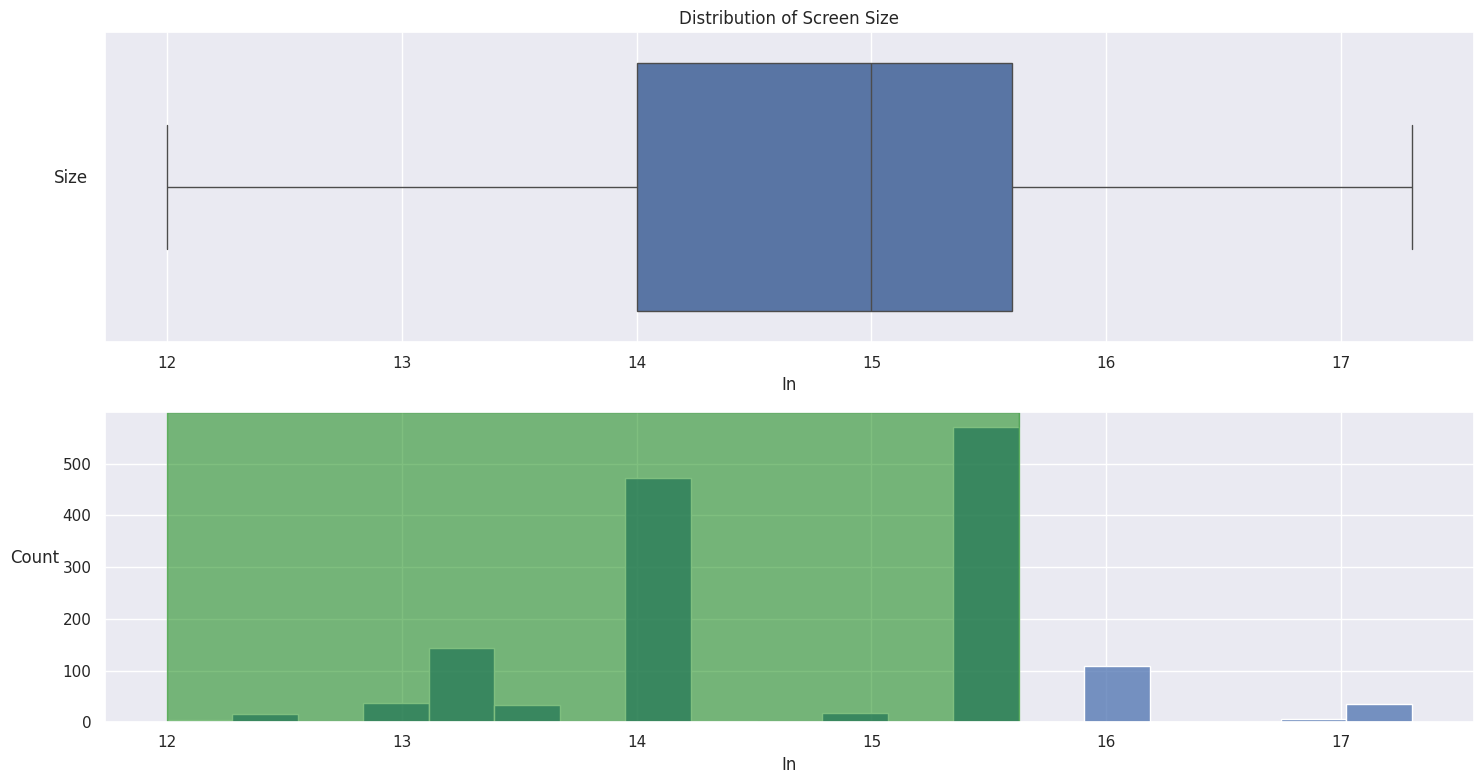

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

sns.boxplot(data=df, x='screen_size_in', flierprops={"marker": "x"}, ax=axes[0])
axes[0].set(xlabel='In', ylabel='Size', title='Distribution of Screen Size')
axes[0].set_ylabel(axes[0].get_ylabel(), rotation=0, labelpad=15)

sns.histplot(data=df, x='screen_size_in', ax=axes[1])
axes[1].set(xlabel='In', ylabel='Count')
axes[1].set_ylabel(axes[1].get_ylabel(), rotation=0, labelpad=20)
plt.axvspan(12, 15.63, color='green', alpha=0.5)

plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'screen_size_distribution' + '.png')

Plot gpuBrand considering if dedicated or not

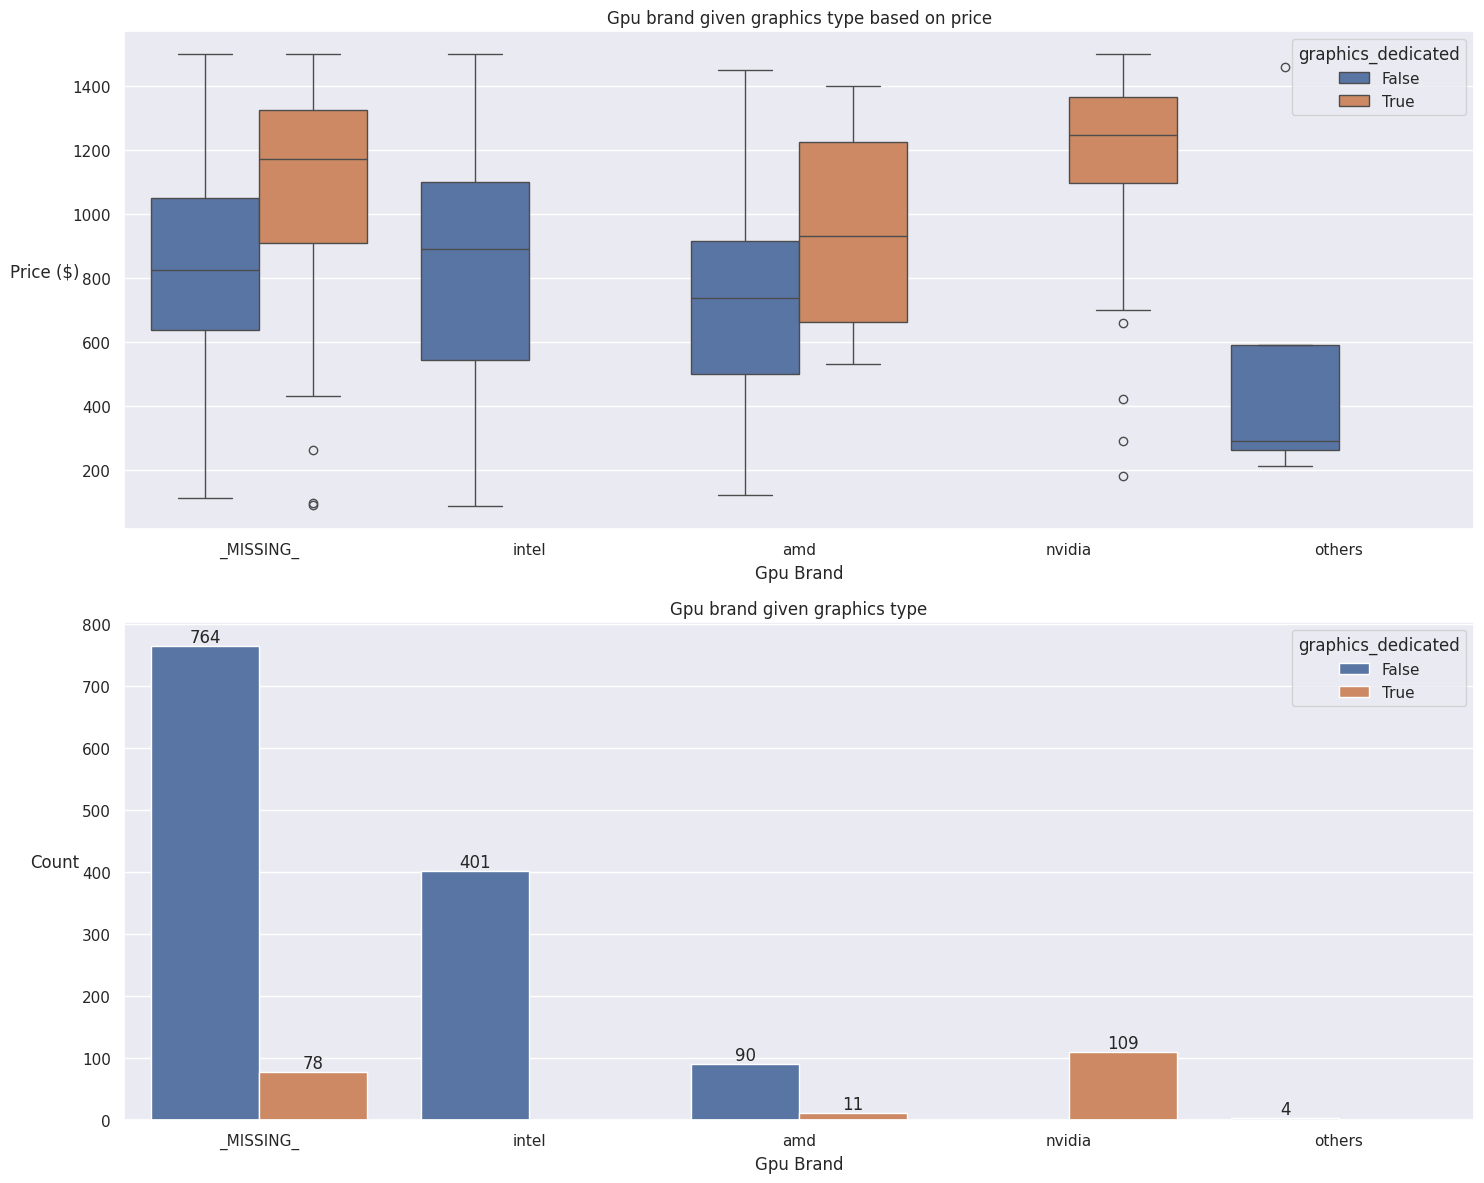

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

plot1 = sns.countplot(data=df, x='gpuBrand', hue='graphics_dedicated', ax=axes[1])
plot1.set(xlabel='Gpu Brand', ylabel='Count', title='Gpu brand given graphics type')
plot1.bar_label(plot1.containers[0])
plot1.bar_label(plot1.containers[1])
plot1.set_ylabel(plot1.get_ylabel(), rotation=0, labelpad=20)

plot2 = sns.boxplot(data=df, x='gpuBrand', y='price_dollar', hue='graphics_dedicated', ax=axes[0])
plot2.set(xlabel='Gpu Brand', ylabel='Price ($)', title='Gpu brand given graphics type based on price')
plot2.set_ylabel(plot2.get_ylabel(), rotation=0, labelpad=20)

plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'gpuBrand_graphics' + '.png')

Plot CPU brand distribution

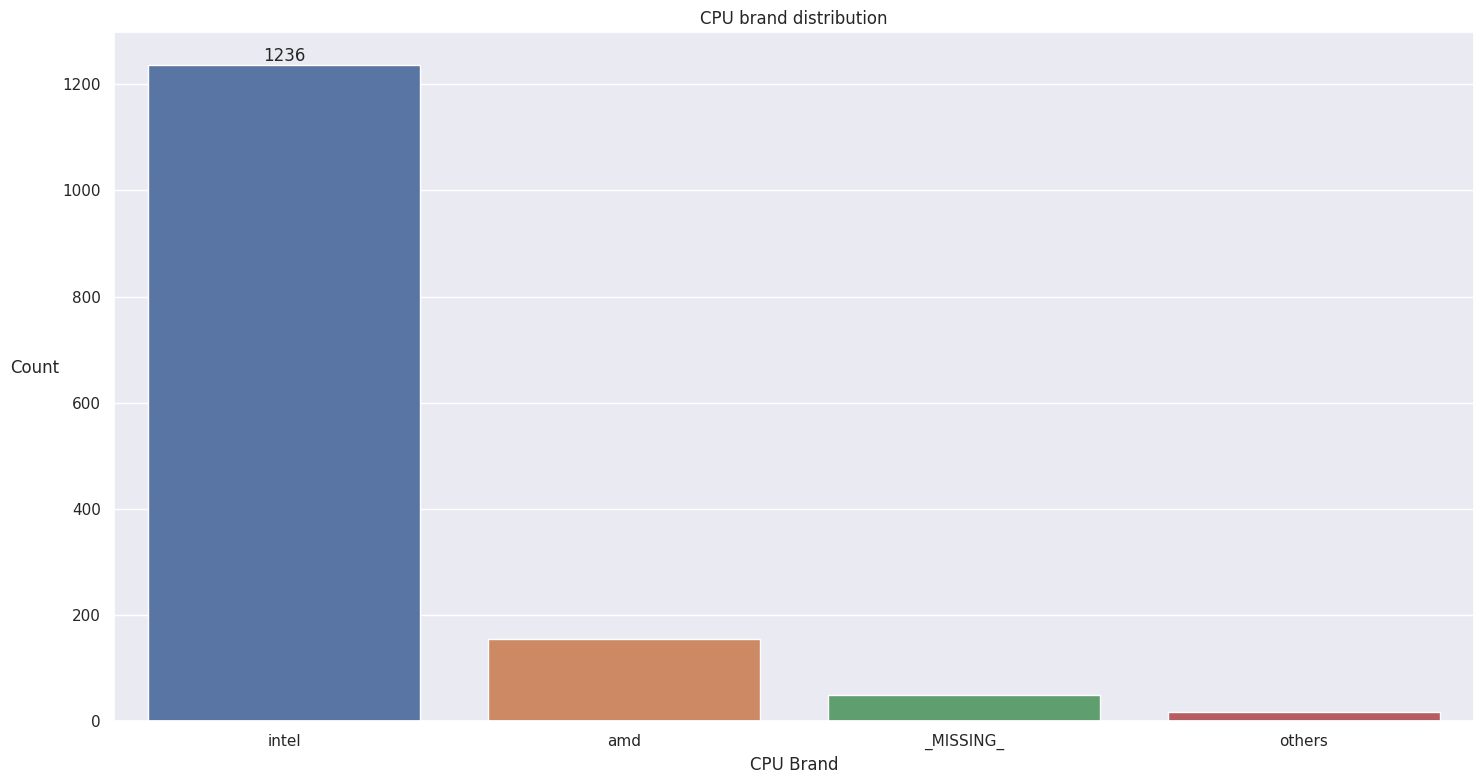

In [69]:
plt.figure(figsize=(15, 8))
plot = sns.countplot(data=df, x='cpuBrand', hue='cpuBrand')
plot.set(xlabel='CPU Brand', ylabel='Count', title='CPU brand distribution')
plot.set_ylabel(plot.get_ylabel(), rotation=0, labelpad=20)
plot.bar_label(plot.containers[0])
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'cpuBrand' + '.png')

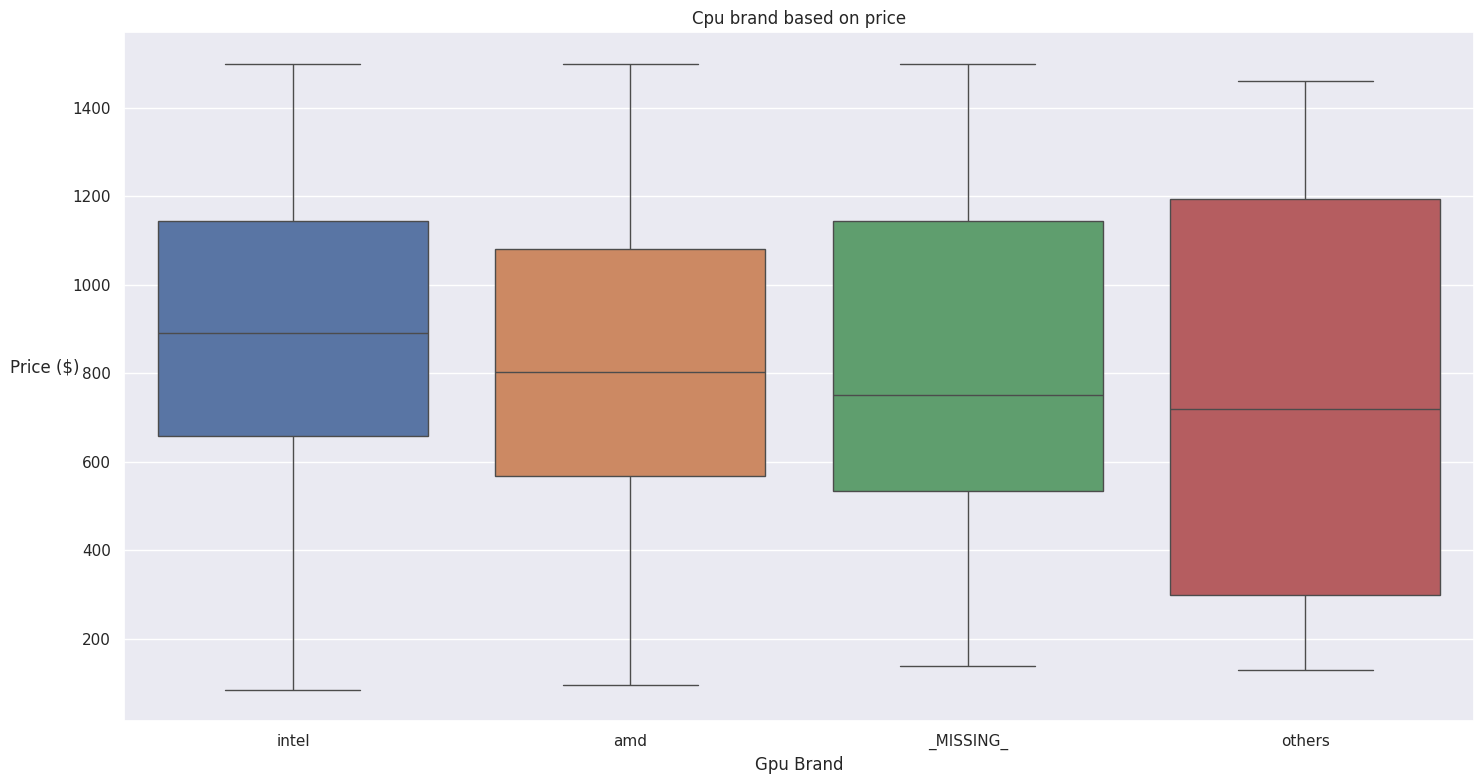

In [70]:
plt.figure(figsize=(15, 8))
plot = sns.boxplot(data=df, x='cpuBrand', y='price_dollar', hue='cpuBrand')
plot.set(xlabel='Gpu Brand', ylabel='Price ($)', title='Cpu brand based on price')
plot.set_ylabel(plot.get_ylabel(), rotation=0, labelpad=20)
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'cpuBrand_price' + '.png')

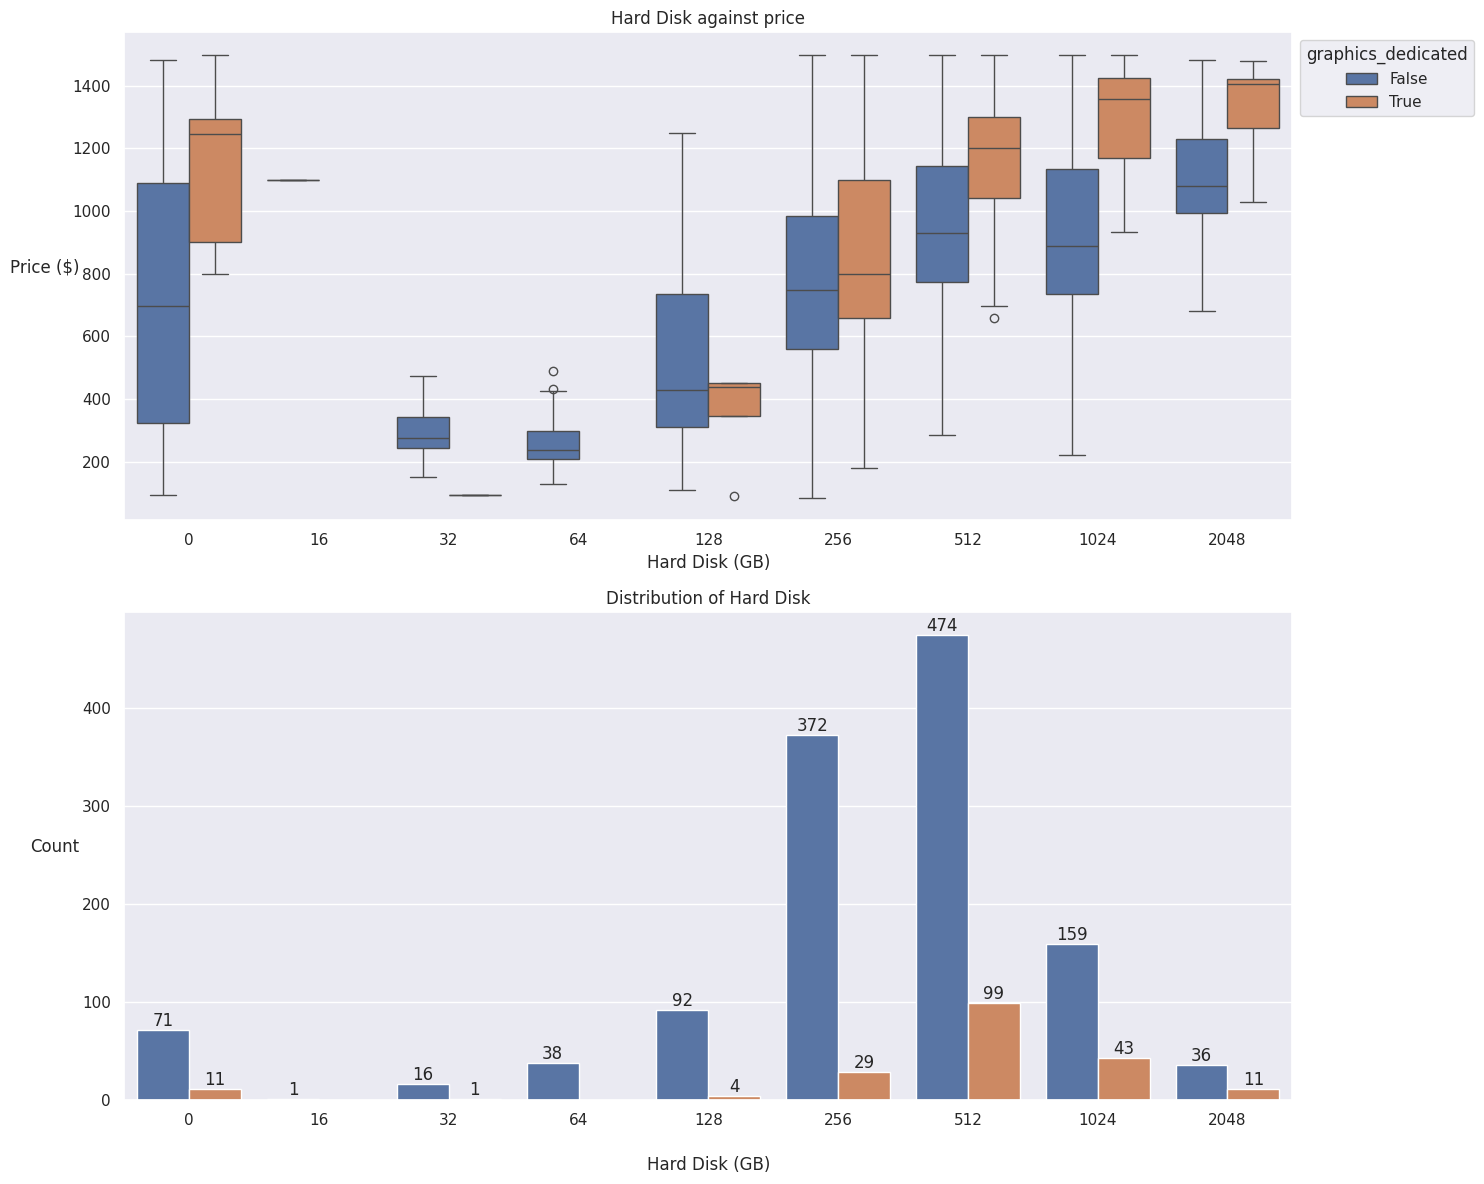

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
df = df.fillna(0)

sns.countplot(data=df, x='harddisk_gb', ax=axes[1], hue='graphics_dedicated')
axes[1].set(xlabel='Hard Disk (GB)', ylabel='Count', title='Distribution of Hard Disk')
axes[1].set_ylabel(axes[1].get_ylabel(), rotation=0, labelpad=20)
axes[1].set_xlabel(axes[1].get_xlabel(), rotation=0, labelpad=20)
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].legend_.remove()

sns.boxplot(data=df, x='harddisk_gb', y='price_dollar', hue='graphics_dedicated', ax=axes[0])
axes[0].set(xlabel='Hard Disk (GB)', ylabel='Price ($)', title='Hard Disk against price')
axes[0].set_ylabel(axes[0].get_ylabel(), rotation=0, labelpad=20)
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'harddisk_price' + '.png')

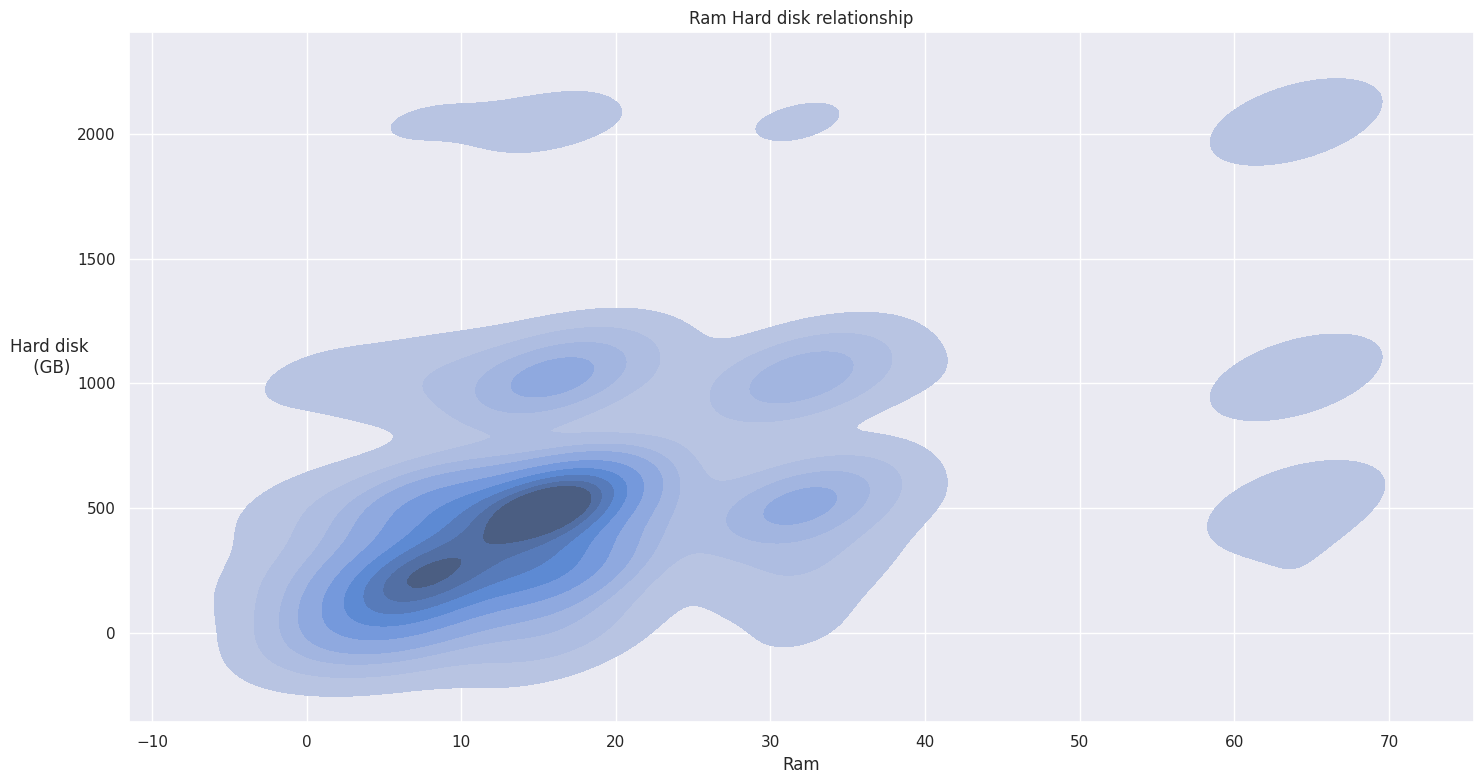

In [72]:
plt.figure(figsize=(15, 8))
plot = sns.kdeplot(data=df, x='ram_gb', y='harddisk_gb', fill=True)
plot.set(xlabel='Ram', ylabel='Hard disk\n (GB)', title='Ram Hard disk relationship')
plot.set_ylabel(plot.get_ylabel(), rotation=0, labelpad=20)

plt.tight_layout()
if FILEPATH:
    plt.savefig(FILEPATH + 'ram_hdd_kde' + '.png')